#**Dataset - Kaggle**

https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml

#**Degrading SciKit-Learn**
1.6.0 isn't compatible with xgb for whatever reason

Putting it at the start so the code doesn't keep restarting mid code lol

In [ ]:
!pip install scikit-learn==1.3.0

#**EDA**

In [ ]:
# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Reading data
df = pd.read_csv('/content/AgrifoodCO2Emission.csv')
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [ ]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [ ]:
# Checking describe
df.describe()

Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1536.640000                   690.408800   
max       164915.255600                241025.069600   

       Pesticides Manufacturing  Food Transport     Forestland  \
count               6965.000000     6965.000000    6472.000000   
mean                 333.418393     1939.581760  -17828.285678   
std                 1429.159367     5616.748808   81832.210543   
min                    0.000000        0.000100 -797183.079000   
25%                    6.000000       27.958600   -2848.350000   
50%                   13.000000      204.962800     -62.920000   
75%                  116.325487     1207.000900       0.000000   
max                16459.000000    67945.765000  171121.076000   

       Net Forest conversion  ...  Manure Management  Fires in organic soils  \
count           6.472000e+03  ...        6037.000000             6965.000000   
mean            1.760564e+04  ...        2263.344946             1210.315532   
std             1.011575e+05  ...        7980.542461            22669.847760   
min             0.000000e+00  ...           0.432900                0.000000   
25%             0.000000e+00  ...          37.632100                0.000000   
50%             4.444000e+01  ...         269.856300                0.000000   
75%             4.701746e+03  ...        1126.818900                0.000000   
max             1.605106e+06  ...       70592.646500           991717.543100   

       Fires in humid tropical forests  On-farm energy use  Rural population  \
count                      6810.000000         6009.000000      6.965000e+03   
mean                        668.452931         3008.982252      1.785774e+07   
std                        3264.879486        12637.864430      8.901521e+07   
min                           0.000000            0.031900      0.000000e+00   
25%                           0.000000           13.291900      9.731100e+04   
50%                           0.000000          141.096300      1.595322e+06   
75%                           9.577875         1136.925400      8.177340e+06   
max                       51771.256800       248879.176900      9.000991e+08   

       Urban population  Total Population - Male  Total Population - Female  \
count      6.965000e+03             6.965000e+03               6.965000e+03   
mean       1.693230e+07             1.761963e+07               1.732447e+07   
std        6.574362e+07             7.603993e+07               7.251711e+07   
min        0.000000e+00             2.500000e+02               2.700000e+02   
25%        2.173860e+05             2.013260e+05               2.078900e+05   
50%        2.357581e+06             2.469660e+06               2.444135e+06   
75%        8.277123e+06             9.075924e+06               9.112588e+06   
max        9.020778e+08             7.435866e+08               7.133419e+08   

       total_emission  Average Temperature °C  
count    6.965000e+03             6965.000000  
mean     6.409124e+04                0.872989  
std      2.283130e+05

In [ ]:
# Checking columns
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [ ]:
print(f'{df["Year"].max()}'
      f'\n{df["Year"].min()}')

2020
1990


In [ ]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

#**Preprocessing**

#**Cleaning Column Names**

In [ ]:
# Renaming columns for easier access (best practice)
df.columns = (
    df.columns
    .str.title()
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('-', '')
    .str.replace(' ', '_')
)

df.columns

Index(['Area', 'Year', 'Savanna_Fires', 'Forest_Fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'OnFarm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'Ippu', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'OnFarm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population__Male',
       'Total_Population__Female', 'Total_Emission', 'Average_Temperature_°C'],
      dtype='object')

In [ ]:
# Manually renaming some columns
df.rename(columns = {'Total_Population__Female': 'Total_Population_Female',
                    'Total_Population__Male': 'Total_Population_Male',
                     'OnFarm_Energy_Use': 'On_Farm_Energy_Use',
                     'OnFarm_Electricity_Use': 'On_Farm_Electricity_Use',
                     'Ippu': 'IPPU',
                     'Average_Temperature_°C': 'Average_Temperature_C'},
          inplace = True)
df.columns

Index(['Area', 'Year', 'Savanna_Fires', 'Forest_Fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On_Farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population_Male',
       'Total_Population_Female', 'Total_Emission', 'Average_Temperature_C'],
      dtype='object')

#**Checking Nulls**

In [ ]:
# Number of records
print(f'Total Rows: {len(df)}')

Total Rows: 6965


In [ ]:
# Number of nulls
print(f'Total Null Values: {df.isnull().sum().sum()}'
f'\n\nNull Values Per Column:\n\n{df.isnull().sum()}')

Total Null Values: 6682

Null Values Per Column:

Area                                  0
Year                                  0
Savanna_Fires                        31
Forest_Fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_Organic_Soils_Co2             0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_Conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On_Farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_Applied_To_Soils             928
Manure_Left_On_Pasture                0
Manure_Management                   928
Fires_In_Organic_Soils                0
Fires_In_Humid_Tropical_Forest

#**Columns Distribution**
- Finding distributions of numerical columns
- Aids in the filling null values steps

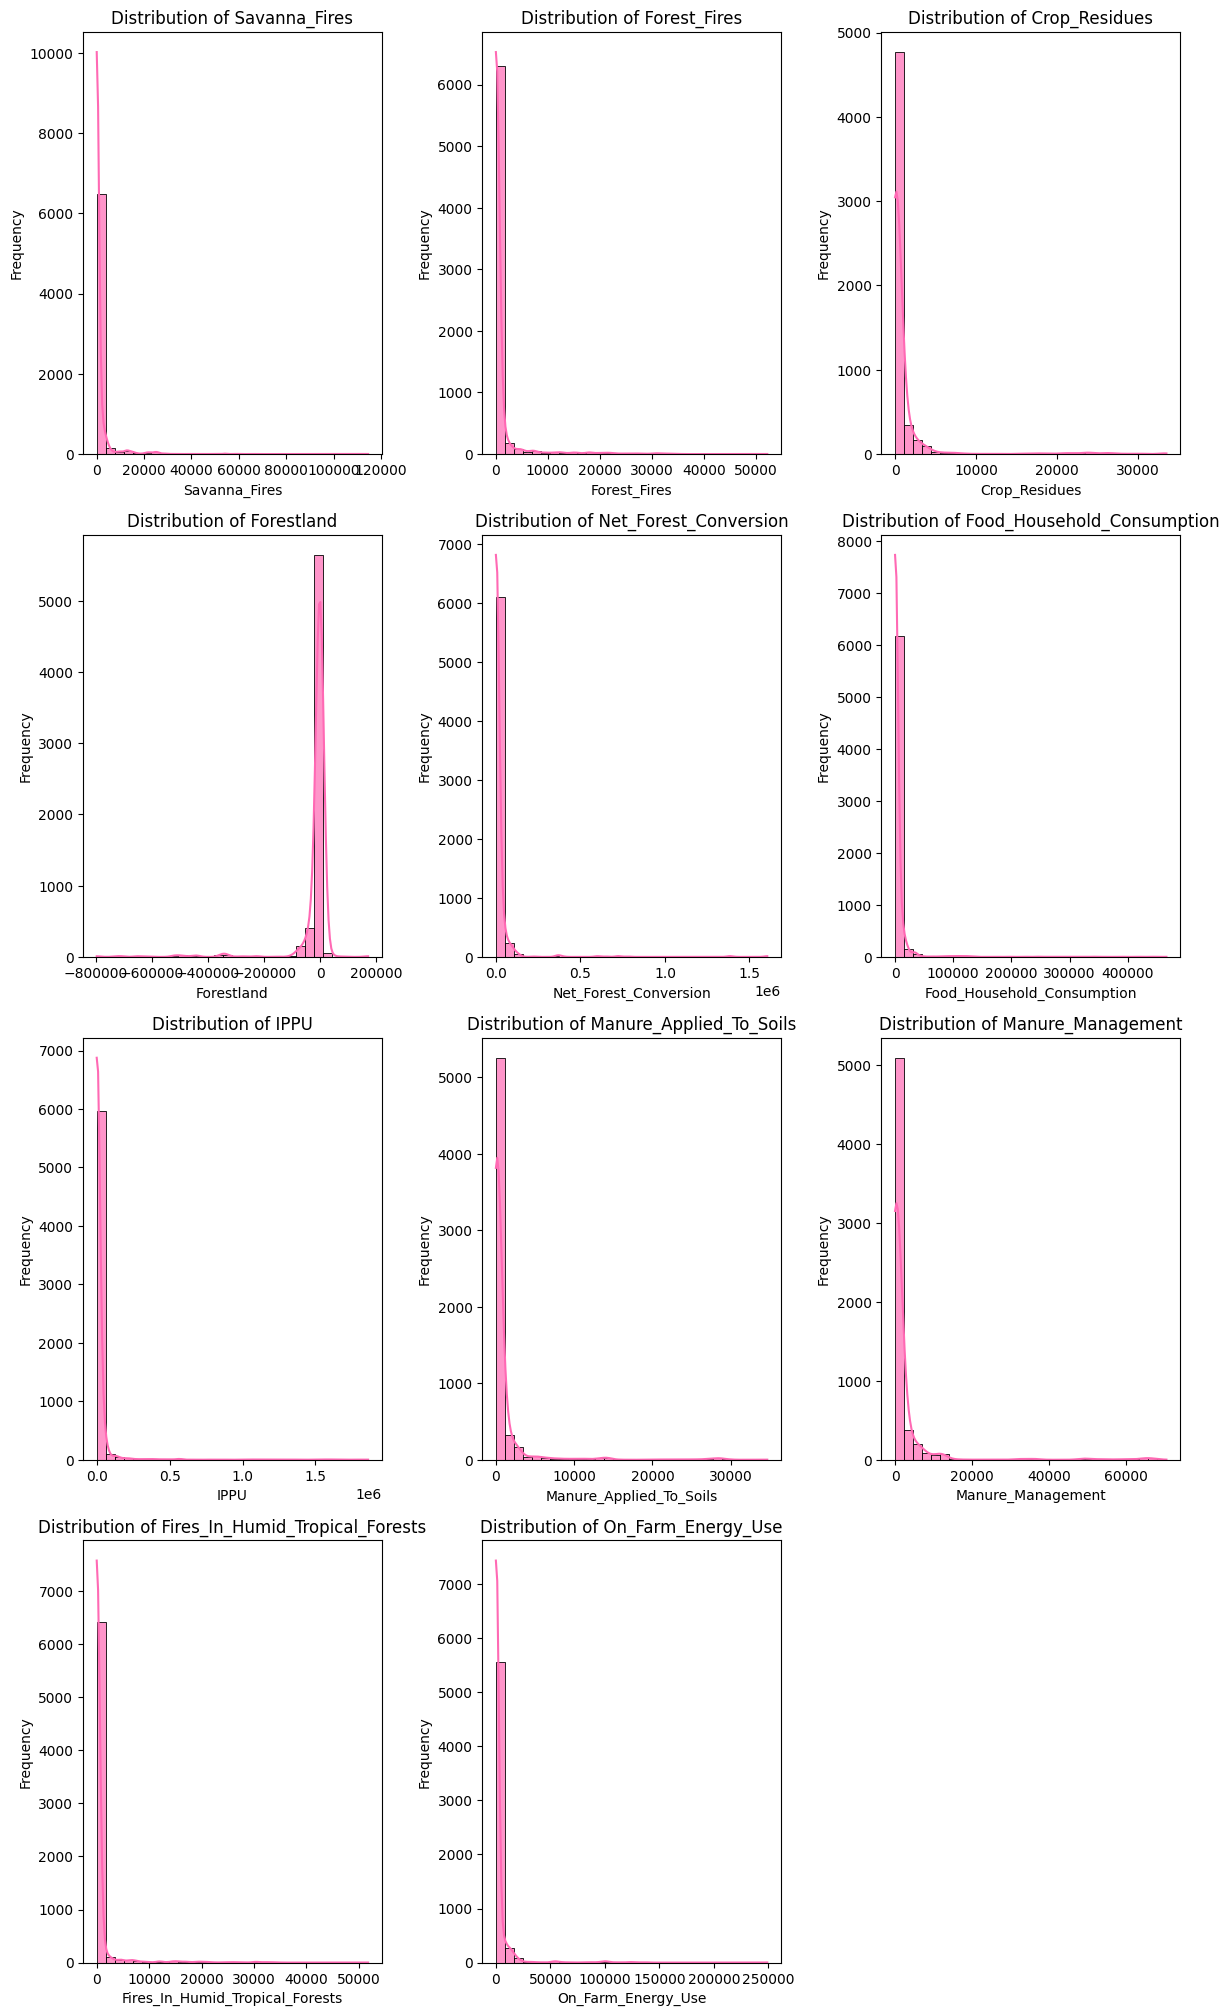

In [ ]:
# numerical columns
numerical_cols = df.select_dtypes(include = ['float64', 'int64']).columns

# null numerical columns
null_numerical_cols = numerical_cols[df[numerical_cols].isnull().any()]

num = len(numerical_cols) # 3 graphs per row
rows = (num + 3 - 1) // 3 # total rows for subplots

# creating subplots
fig, axes = plt.subplots(rows, 3, figsize = (12, 5 * rows))
axes = axes.flatten() # flatten = 1D list

# looping to create the subplots
for i, col in enumerate(null_numerical_cols):
  sns.histplot(df[col].dropna(), # can't plot nulls
               kde = True, # line for better visualization
               bins = 30,
               ax = axes[i],
               color = 'hotpink',
               edgecolor = 'black',
               alpha = 0.7)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# removing unused subplots so it looks neat lol
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j]) # removing the extra axes, again so it's neat

# printing subplots
plt.tight_layout()
plt.show()

#**Insights From Above**
- This'll help me know how to fill the null values in the columns

- Columns Skewed Left:
  ['Savanna Fires'
   'Forest Fires'
   'Crop Residues'
   'Net Forest Conversion'
   'Food Household Consumption'
   'IPPU'
   'Manure Applied to Soils'
   'Manure Management'
   'Fires in Humid Tropical Forests'
   'On-farm Energy Use'
  ]

- Columns Skewed Right:
  ['Forestland'
  ]

- Skewed right - use forward fill
- Skewed left: use backward fill
- Leftovers: use mean

#**Filling Nulls**

In [ ]:
# keeping og df safe and unchanged
filled_df = df.copy()

In [ ]:
print(f'Nulls Before Filling: {filled_df.isnull().sum().sum()}')

Nulls Before Filling: 6682


In [ ]:
filled_df.columns

Index(['Area', 'Year', 'Savanna_Fires', 'Forest_Fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils_Co2',
       'Pesticides_Manufacturing', 'Food_Transport', 'Forestland',
       'Net_Forest_Conversion', 'Food_Household_Consumption', 'Food_Retail',
       'On_Farm_Electricity_Use', 'Food_Packaging',
       'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_Applied_To_Soils',
       'Manure_Left_On_Pasture', 'Manure_Management', 'Fires_In_Organic_Soils',
       'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use',
       'Rural_Population', 'Urban_Population', 'Total_Population_Male',
       'Total_Population_Female', 'Total_Emission', 'Average_Temperature_C'],
      dtype='object')

In [ ]:
# forward fill (for skewed left)
cols_skewed_left = ['Savanna_Fires',
                    'Forest_Fires',
                    'Crop_Residues',
                    'Net_Forest_Conversion',
                    'Food_Household_Consumption',
                    'IPPU',
                    'Manure_Applied_To_Soils',
                    'Manure_Management',
                    'Fires_In_Humid_Tropical_Forests',
                    'On_Farm_Energy_Use']

for col in cols_skewed_left: # loops thru col names
  if col in filled_df.columns: # checks col's in df
    filled_df[col].fillna(method = 'ffill', inplace = True) # fills

# backward Fill (for skewed right)
cols_skewed_right = ['Forestland']

for col in cols_skewed_right: # loops thru col names
  if col in filled_df.columns: # checks col's in df
    filled_df[col].fillna(method = 'bfill', inplace = True) # fills

<ipython-input-20-5b732ecdc834>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filled_df[col].fillna(method = 'ffill', inplace = True) # fills
<ipython-input-20-5b732ecdc834>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_df[col].fillna(method = 'ffill', inplace = True) # fills
<ipython-input-20-5b732ecdc834>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an i

In [ ]:
print(f'Nulls After Filling: {filled_df.isnull().sum().sum()}')

Nulls After Filling: 31


In [ ]:
# nulls still exist, checking which col
filled_df.isnull().sum()

Area                                0
Year                                0
Savanna_Fires                       0
Forest_Fires                        0
Crop_Residues                       0
Rice_Cultivation                    0
Drained_Organic_Soils_Co2           0
Pesticides_Manufacturing            0
Food_Transport                      0
Forestland                          0
Net_Forest_Conversion               0
Food_Household_Consumption          0
Food_Retail                         0
On_Farm_Electricity_Use             0
Food_Packaging                      0
Agrifood_Systems_Waste_Disposal     0
Food_Processing                     0
Fertilizers_Manufacturing           0
IPPU                                0
Manure_Applied_To_Soils             0
Manure_Left_On_Pasture              0
Manure_Management                   0
Fires_In_Organic_Soils              0
Fires_In_Humid_Tropical_Forests     0
On_Farm_Energy_Use                 31
Rural_Population                    0
Urban_Population                    0
Total_Population_Male               0
Total_Population_Female             0
Total_Emission                      0
Average_Temperature_C               0
dtype: int64

In [ ]:
# all nulls left in 1 col: we can just use mean
filled_df['On_Farm_Energy_Use'].fillna(filled_df['On_Farm_Energy_Use'].mean(), inplace = True)

<ipython-input-23-dfb0cee32c2a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filled_df['On_Farm_Energy_Use'].fillna(filled_df['On_Farm_Energy_Use'].mean(), inplace = True)


In [ ]:
# making sure no more nulls left
filled_df.isnull().sum().sum()

0

#**Distribution AFTER Filling**
- Making sure distributions have not changed AFTER filling null values

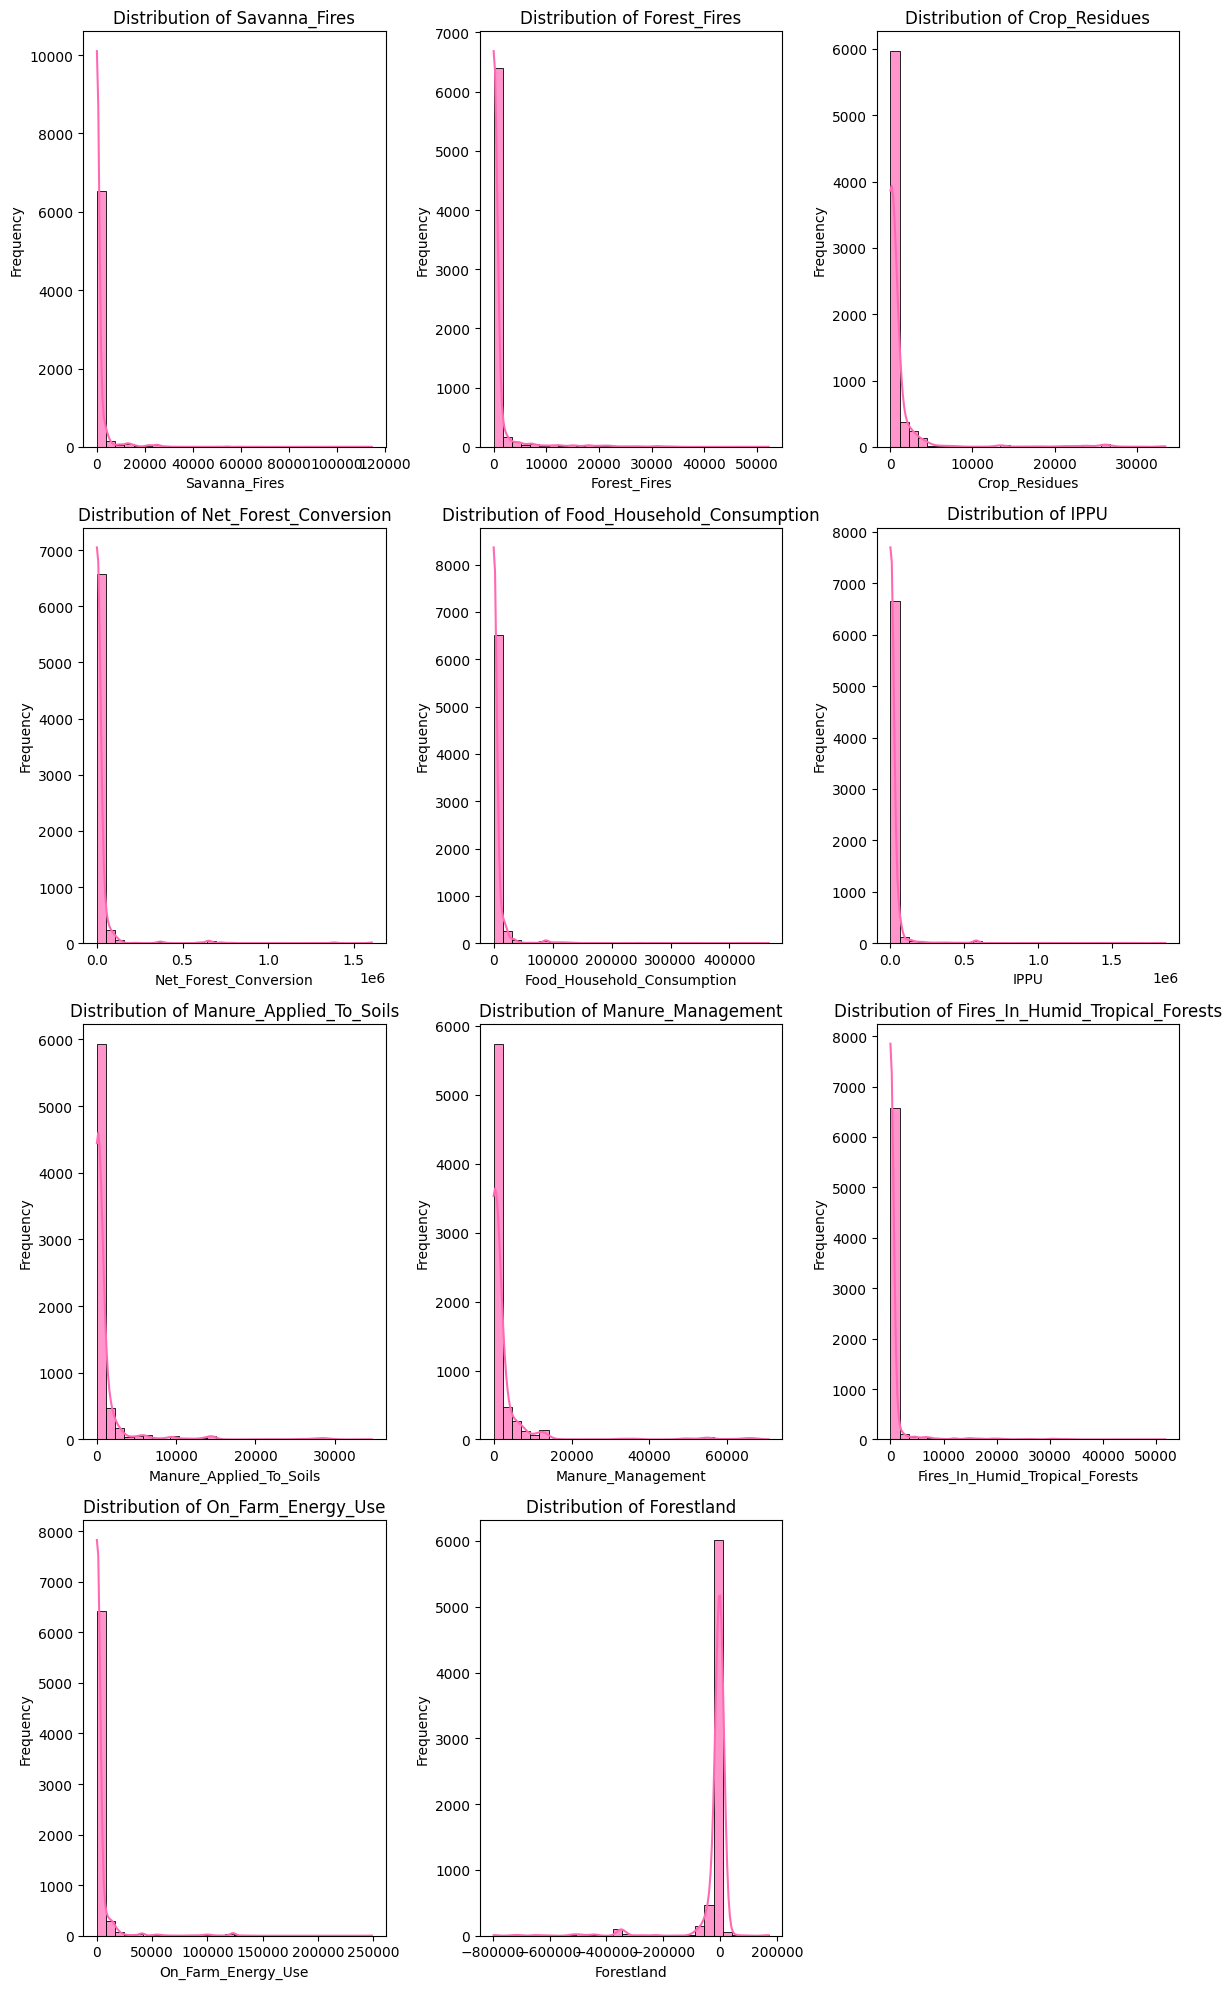

In [ ]:
# numerical columns
skewed_cols = cols_skewed_left + cols_skewed_right

num = len(skewed_cols) # 3 graphs per row
rows = (num + 3 - 1) // 3 # total rows for subplots

# creating subplots
fig, axes = plt.subplots(rows, 3, figsize = (12, 5 * rows))
axes = axes.flatten() # flatten = 1D list

# looping to create the subplots
for i, col in enumerate(skewed_cols):
  sns.histplot(filled_df[col].dropna(), # can't plot nulls
               kde = True, # line for better visualization
               bins = 30,
               ax = axes[i],
               color = 'hotpink',
               edgecolor = 'black',
               alpha = 0.7)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# removing unused subplots so it looks neat lol
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j]) # removing the extra axes, again so it's neat

# printing subplots
plt.tight_layout()
plt.show()

#**Insights From Above**
Success! Distribution of the features have **stayed the same** after filling their null values

#**Deciding Which is Our Target**
- Total Emissions or Temperature?
- I want first check if Total Emissions is *exactly* the sum of **all** existing features or more

In [ ]:
# Columns that contribute to total emissions
sum = ['Savanna_Fires', 'Forest_Fires', 'Crop_Residues',
       'Rice_Cultivation', 'Drained_Organic_Soils_Co2', 'Pesticides_Manufacturing',
       'Food_Transport', 'Forestland', 'Net_Forest_Conversion',
       'Food_Household_Consumption', 'Food_Retail', 'On_Farm_Electricity_Use',
       'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
       'Fertilizers_Manufacturing', 'IPPU', 'Manure_Applied_To_Soils', 'Manure_Management',
       'Fires_In_Organic_Soils', 'Fires_In_Humid_Tropical_Forests', 'On_Farm_Energy_Use']

# Saving calculations in new df
emissions_df = pd.DataFrame()
emissions_df['Emission_Sum'] = df[sum].sum(axis = 1)
emissions_df['Total_Emission'] = df['Total_Emission']
emissions_df['Emission_Difference'] = df['Total_Emission'] - emissions_df['Emission_Sum']
emissions_df['Match'] = df['Total_Emission'] == emissions_df['Emission_Sum']
emissions_df.head()

Emission_Sum  Total_Emission  Emission_Difference  Match
0    608.431639     2198.963539            1590.5319  False
1    666.640229     2323.876629            1657.2364  False
2    702.797429     2356.304229            1653.5068  False
3    725.508229     2368.470529            1642.9623  False
4    811.409429     2500.768729            1689.3593  False

In [ ]:
# Checking if any is True
emissions_df[emissions_df['Match']]

Empty DataFrame
Columns: [Emission_Sum, Total_Emission, Emission_Difference, Match]
Index: []

#**Model Preparation**
- Features **MUST have co-linearity** with Target
- If features have high corelation with one another (ie: 0.7 and up), **remove one because it's redundant** (acts as duplicate)
- If using **Linear** models, ensure data is **normally distributed**

#**All Features Distributions**

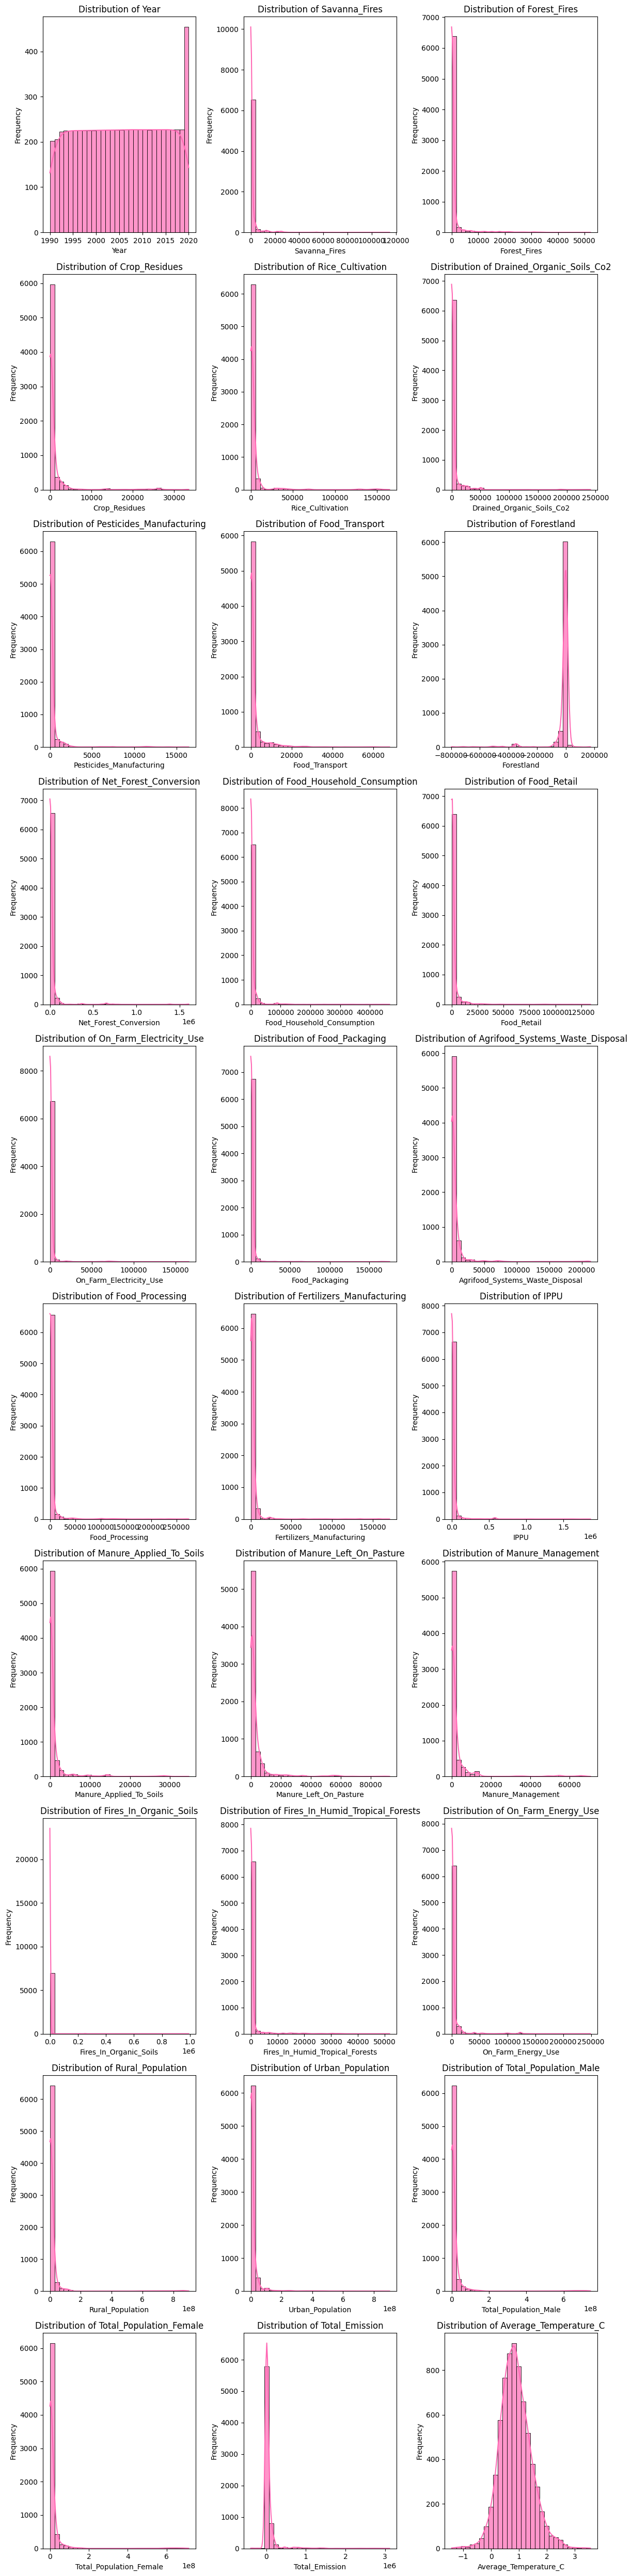

In [ ]:
# Numerical columns
numerical_cols = filled_df.select_dtypes(include = ['float64', 'int64']).columns

num = len(numerical_cols) # 3 graphs per row
rows = (num + 3 - 1) // 3 # total rows for subplots

# Creating subplots
fig, axes = plt.subplots(rows, 3, figsize = (12, 5 * rows))
axes = axes.flatten() # flatten = 1D list

# Looping to create the subplots
for i, col in enumerate(numerical_cols):
  sns.histplot(filled_df[col].dropna(), # can't plot nulls
               kde = True, # line for better visualization
              bins = 30,
              ax = axes[i],
              color = 'hotpink',
              edgecolor = 'black',
              alpha = 0.7)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Removing unused subplots so it looks neat lol
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j]) # removing the extra axes, again so it's neat

# Printing subplots
plt.tight_layout()
plt.show()

#**Relations With Target**

In [ ]:
# Label encoding categorical cols
lbl = LabelEncoder()
encoded_df = filled_df.copy()

for cols in encoded_df.select_dtypes(include = 'object').columns:
  encoded_df[cols] = lbl.fit_transform(encoded_df[cols])

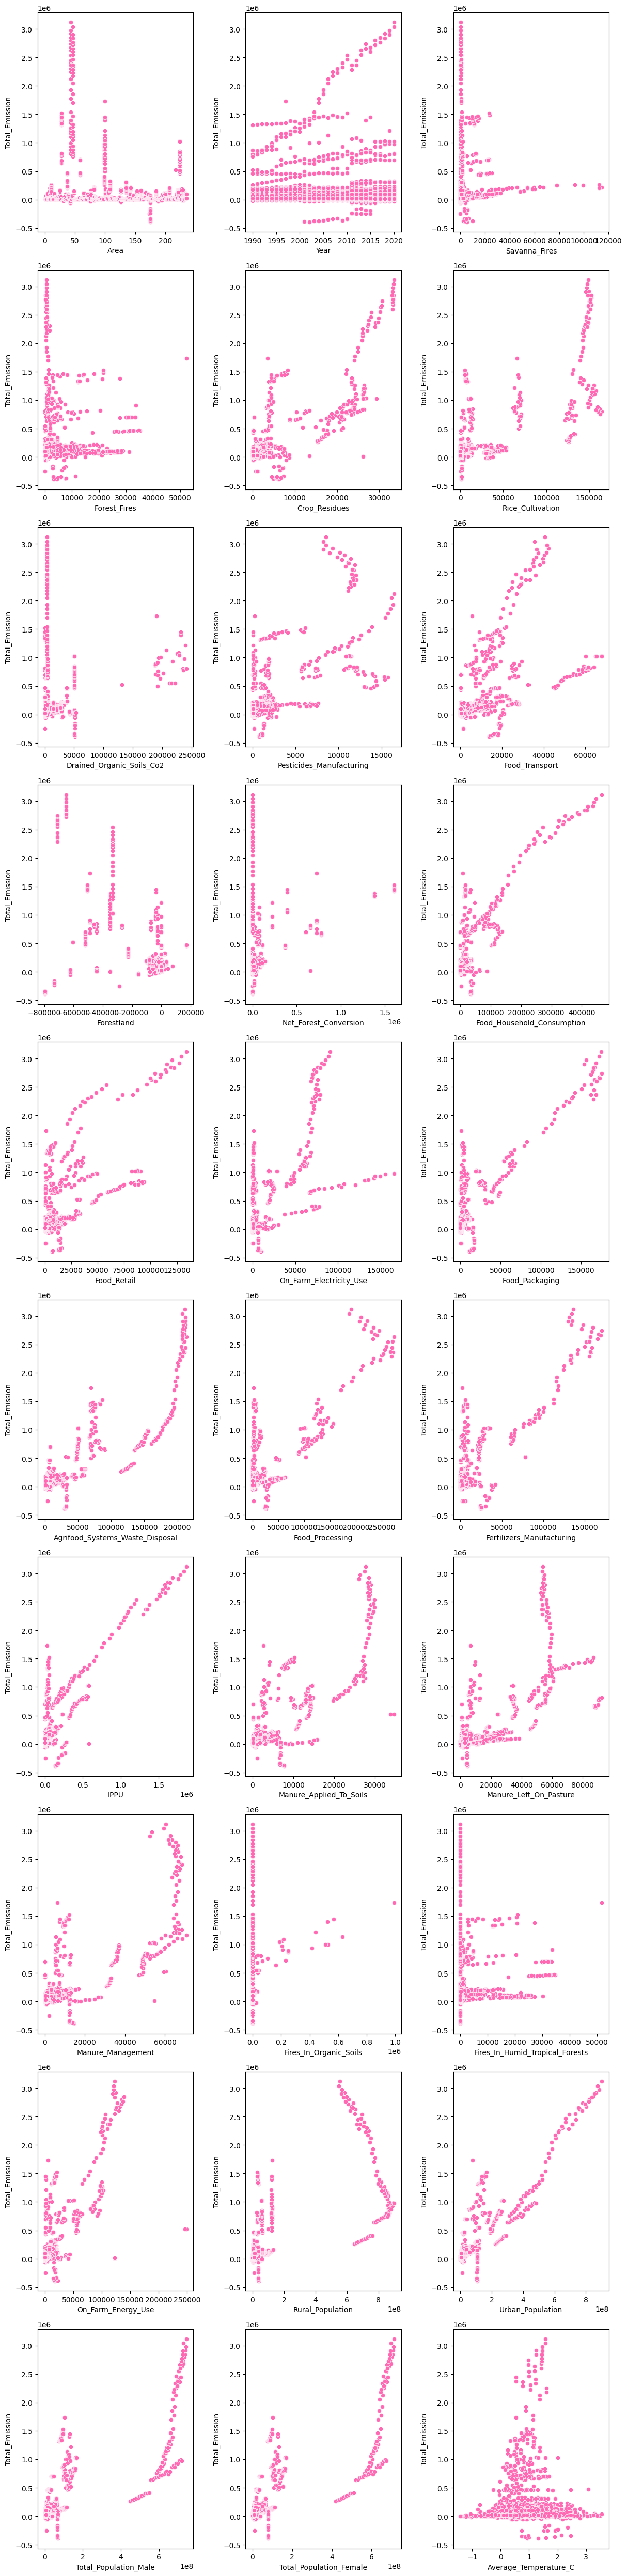

In [ ]:
# Scatter plot to see features relations vs. target (linear or not)
target = 'Total_Emission'
features = [col for col in encoded_df.columns if col != target]

num = len(features)
rows = (num + 3 - 1) // 3

fig, axes = plt.subplots(rows, 3, figsize = (12, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(features):
  sns.scatterplot(data = encoded_df,
                  x = feature,
                  y = target,
                  ax = axes[i], color = 'hotpink')

# same drill, removing unused subplots
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

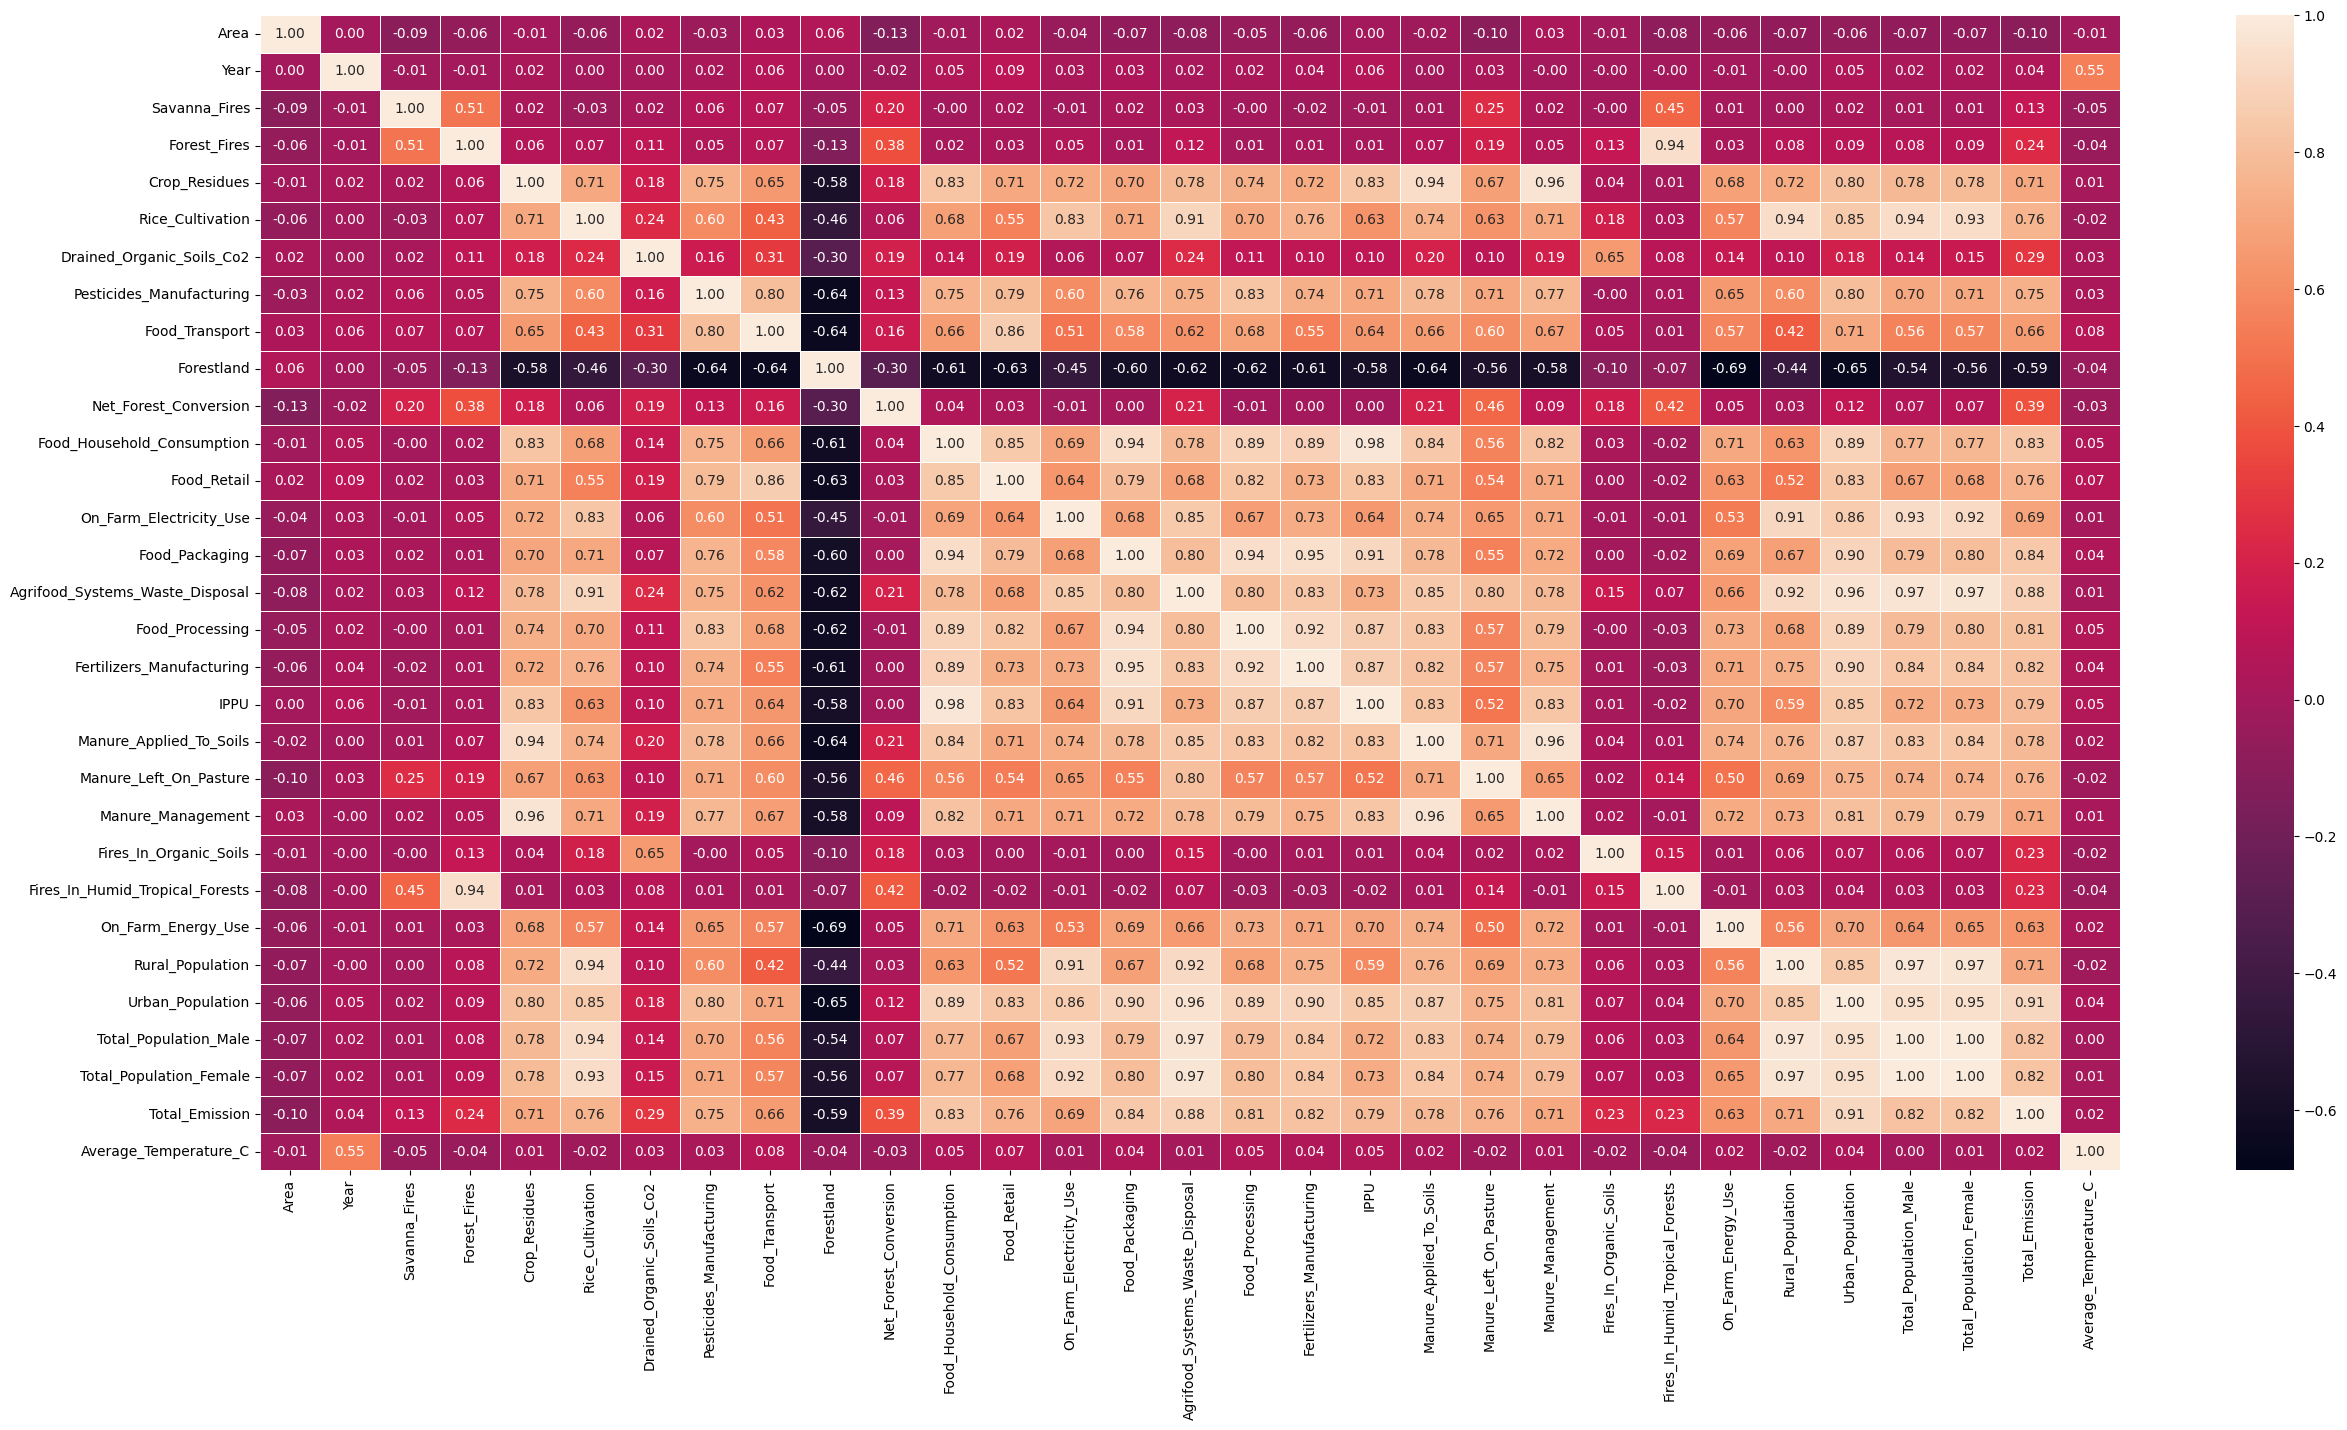

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(encoded_df.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)

#**Insights From Above**
- there is **quiet a few LINEAR relations** between the features & target
- **How Will it Affect My Work?** linear regression models **SHOULD** provide us with high accuracy results

Notes
- none are true: Emission_Sum != Total_Emission
- so there ARE other values affecting total emissions
Target = EITHER Total_Emission OR Average_Temperature_C

My **TARGET** decision: Total_Emission !!
WHY? >
1. Because Total_Emissions includes DIRECT sum from existing features
2. High multicollinearity with other features (compared to Average_Temperature_C)

#**Year vs. Target**
- Metadata says Avg. Temperature is **per year**
- Do we really need to keep the feature 'Year'? **Seems very redundant to do so**

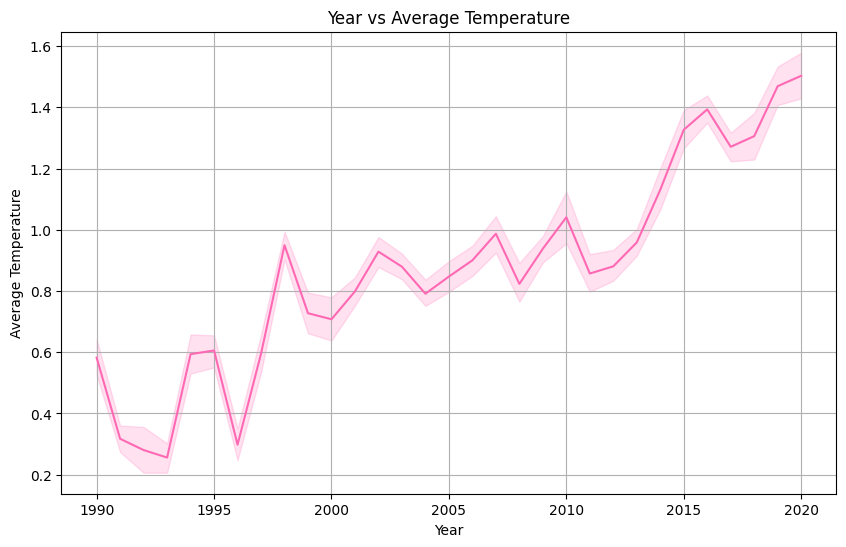

In [ ]:
# Year vs. Avg Temp
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Year',
             y = 'Average_Temperature_C',
             data = encoded_df,
             color = 'hotpink')
plt.title('Year vs Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()

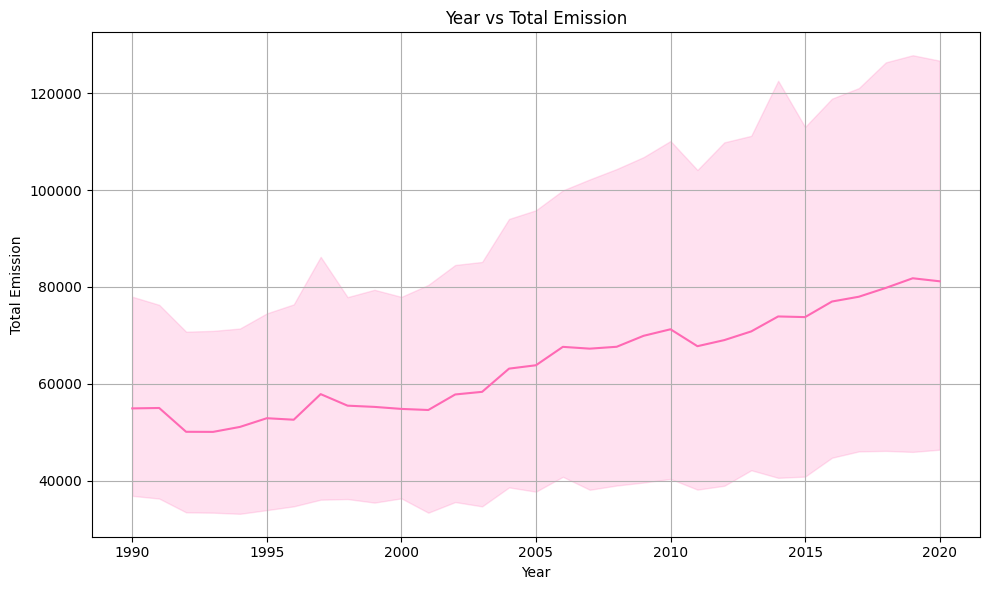

In [ ]:
# Year vs. Avg Temp
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'Year',
             y = 'Total_Emission',
             data = encoded_df,
             color = 'hotpink')
plt.title('Year vs Total Emission')
plt.xlabel('Year')
plt.ylabel('Total Emission')
plt.grid(True)
plt.tight_layout()
plt.show()

#**Insights From Above**
- Year & target are **directly related** to one another

In [ ]:
# Seeing population range

# Rural Population
rural_max = encoded_df['Rural_Population'].max()
rural_min = encoded_df['Rural_Population'].min()
rural_range = rural_max - rural_min

# Total Population - Female
female_max = encoded_df['Total_Population_Female'].max()
female_min = encoded_df['Total_Population_Female'].min()
female_range = female_max - female_min

# Total Population - Male
male_max = encoded_df['Total_Population_Male'].max()
male_min = encoded_df['Total_Population_Male'].min()
male_range = male_max - male_min

# Area
area_max = encoded_df['Area'].max()
area_min = encoded_df['Area'].min()
area_range = area_max - area_min

# Printing
print(f'Rural: Max = {rural_max}, Min = {rural_min}, Range = {rural_range}'
      f'\nFemale: Max = {female_max}, Min = {female_min}, Range = {female_range}'
      f'\nMale: Max = {male_max}, Min = {male_min}, Range = {male_range}'
      f'\nArea: Max = {area_max}, Min = {area_min}, Range = {area_range}')

Rural: Max = 900099113.0, Min = 0.0, Range = 900099113.0
Female: Max = 713341908.0, Min = 270.0, Range = 713341638.0
Male: Max = 743586579.0, Min = 250.0, Range = 743586329.0
Area: Max = 235, Min = 0, Range = 235


In [ ]:
# Insights from above
# - Gotta transform these 4 columns as well
# - But why 'Area' as well? Wasn't it categortical?
# * Yes BUT it has a high range (235), which could cause some bias
# * Label encoder is ORDINAL

#**Eliminating Multicollinearity: Correlation Technique**

<Axes: >

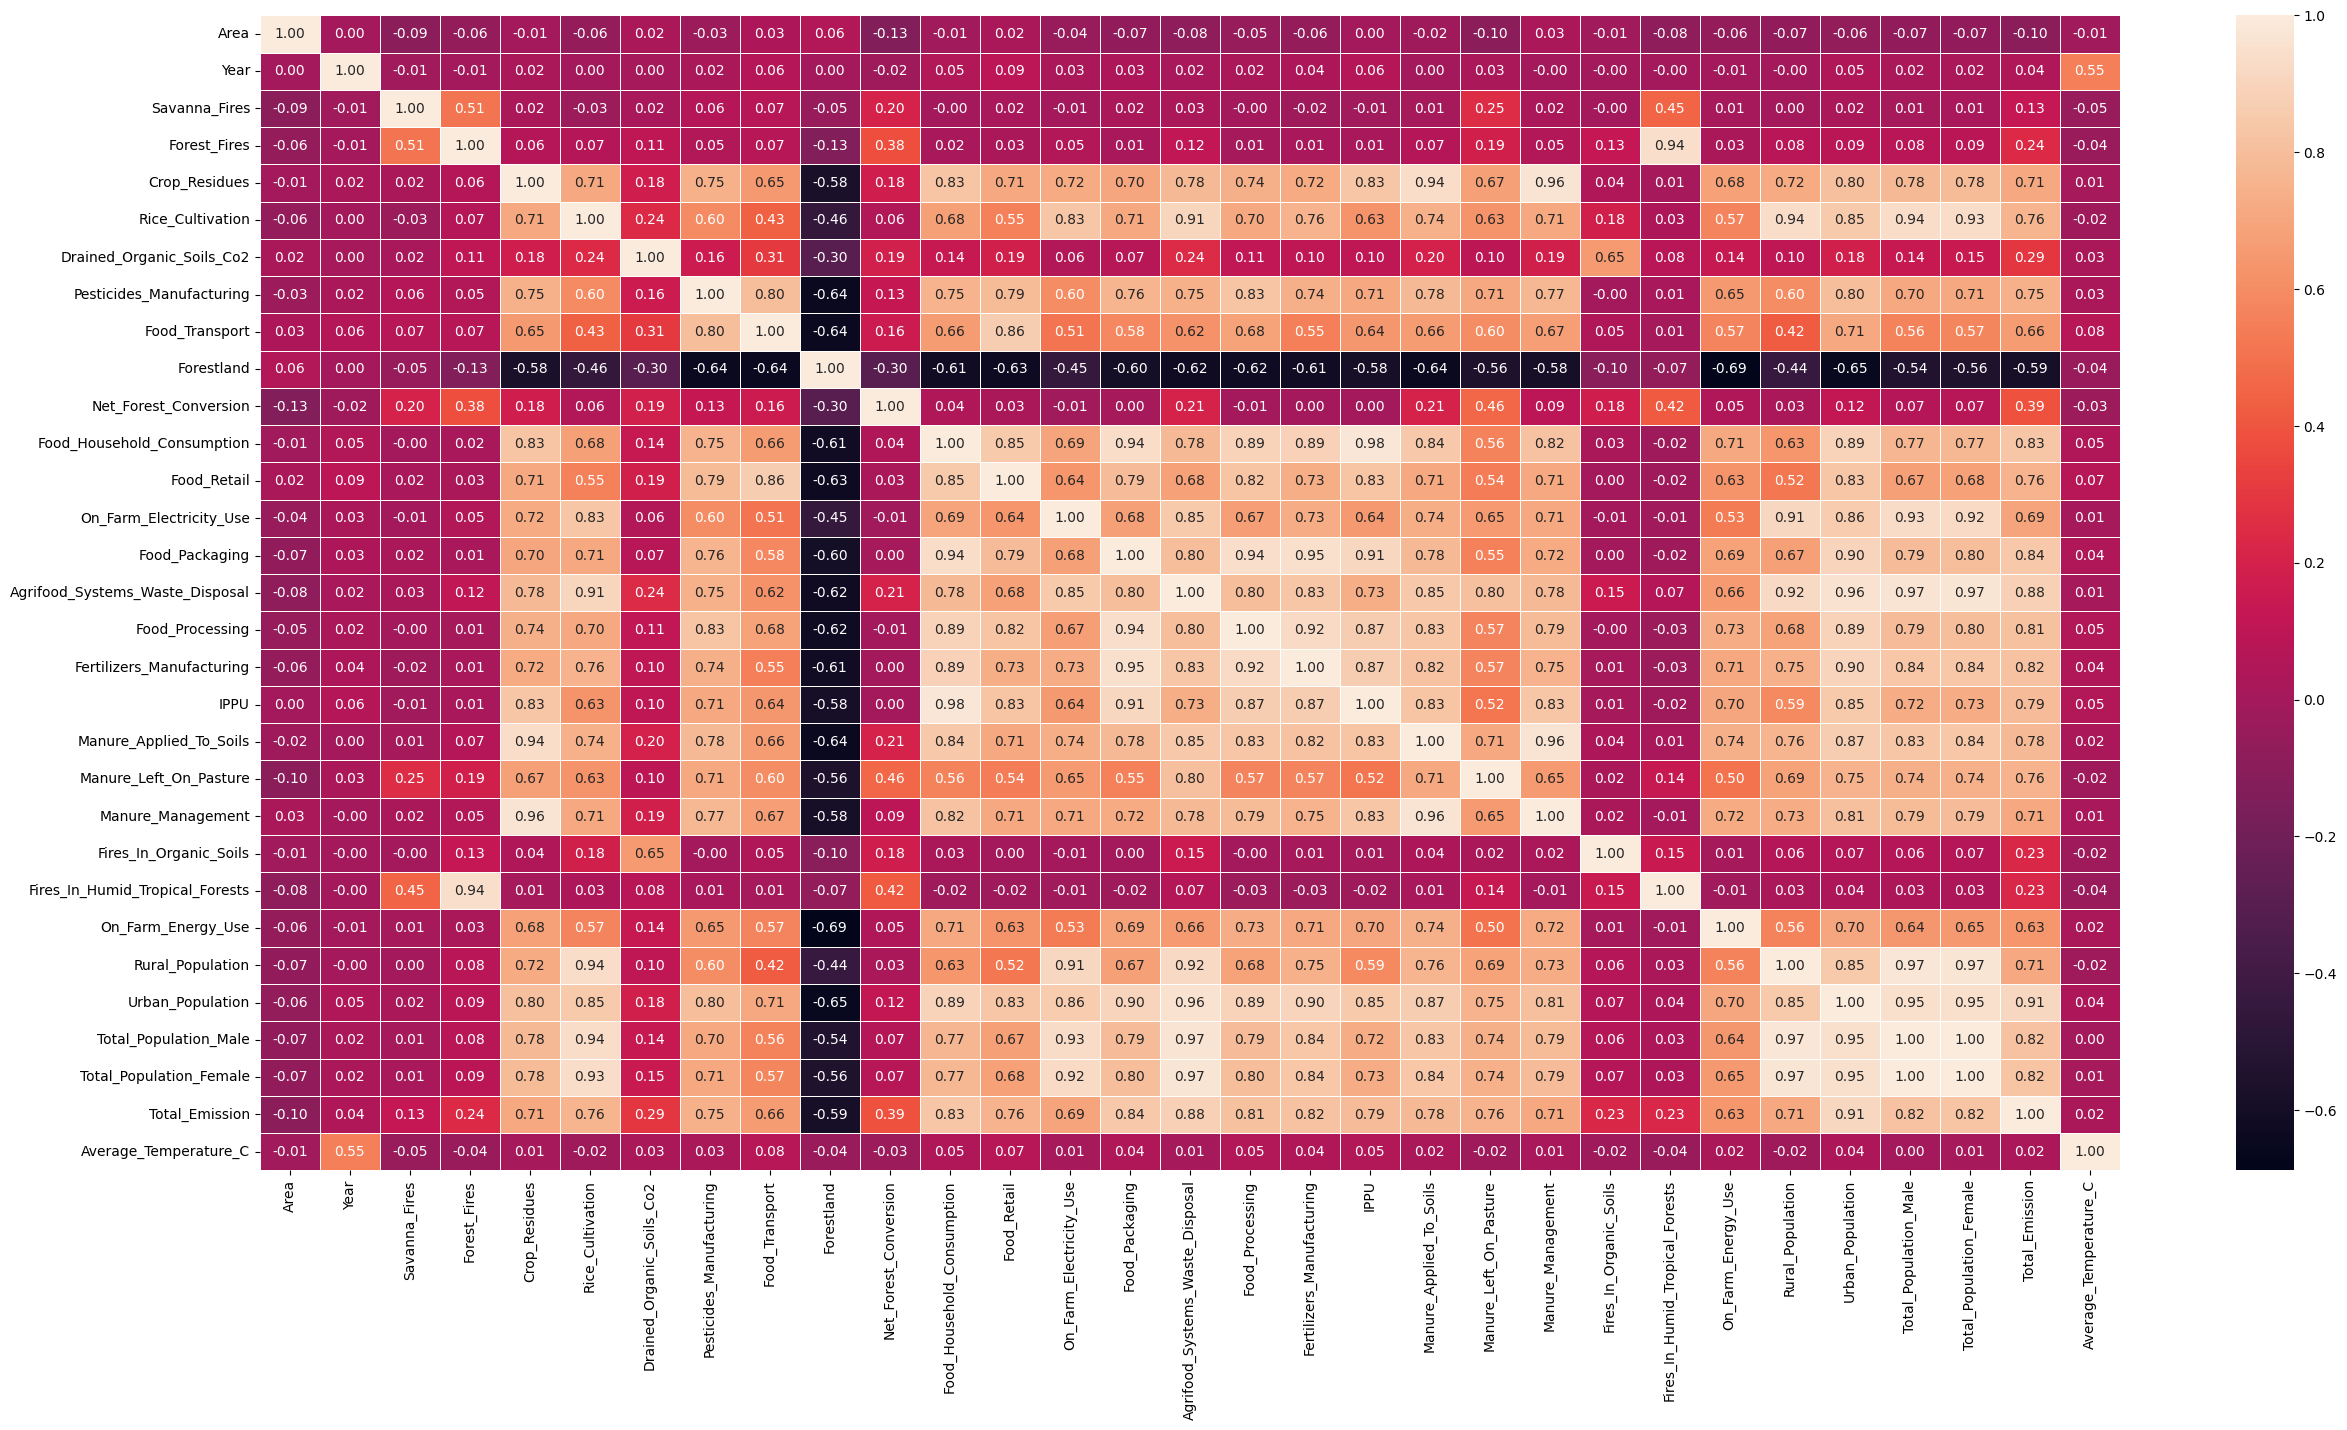

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(encoded_df.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)

<Axes: >

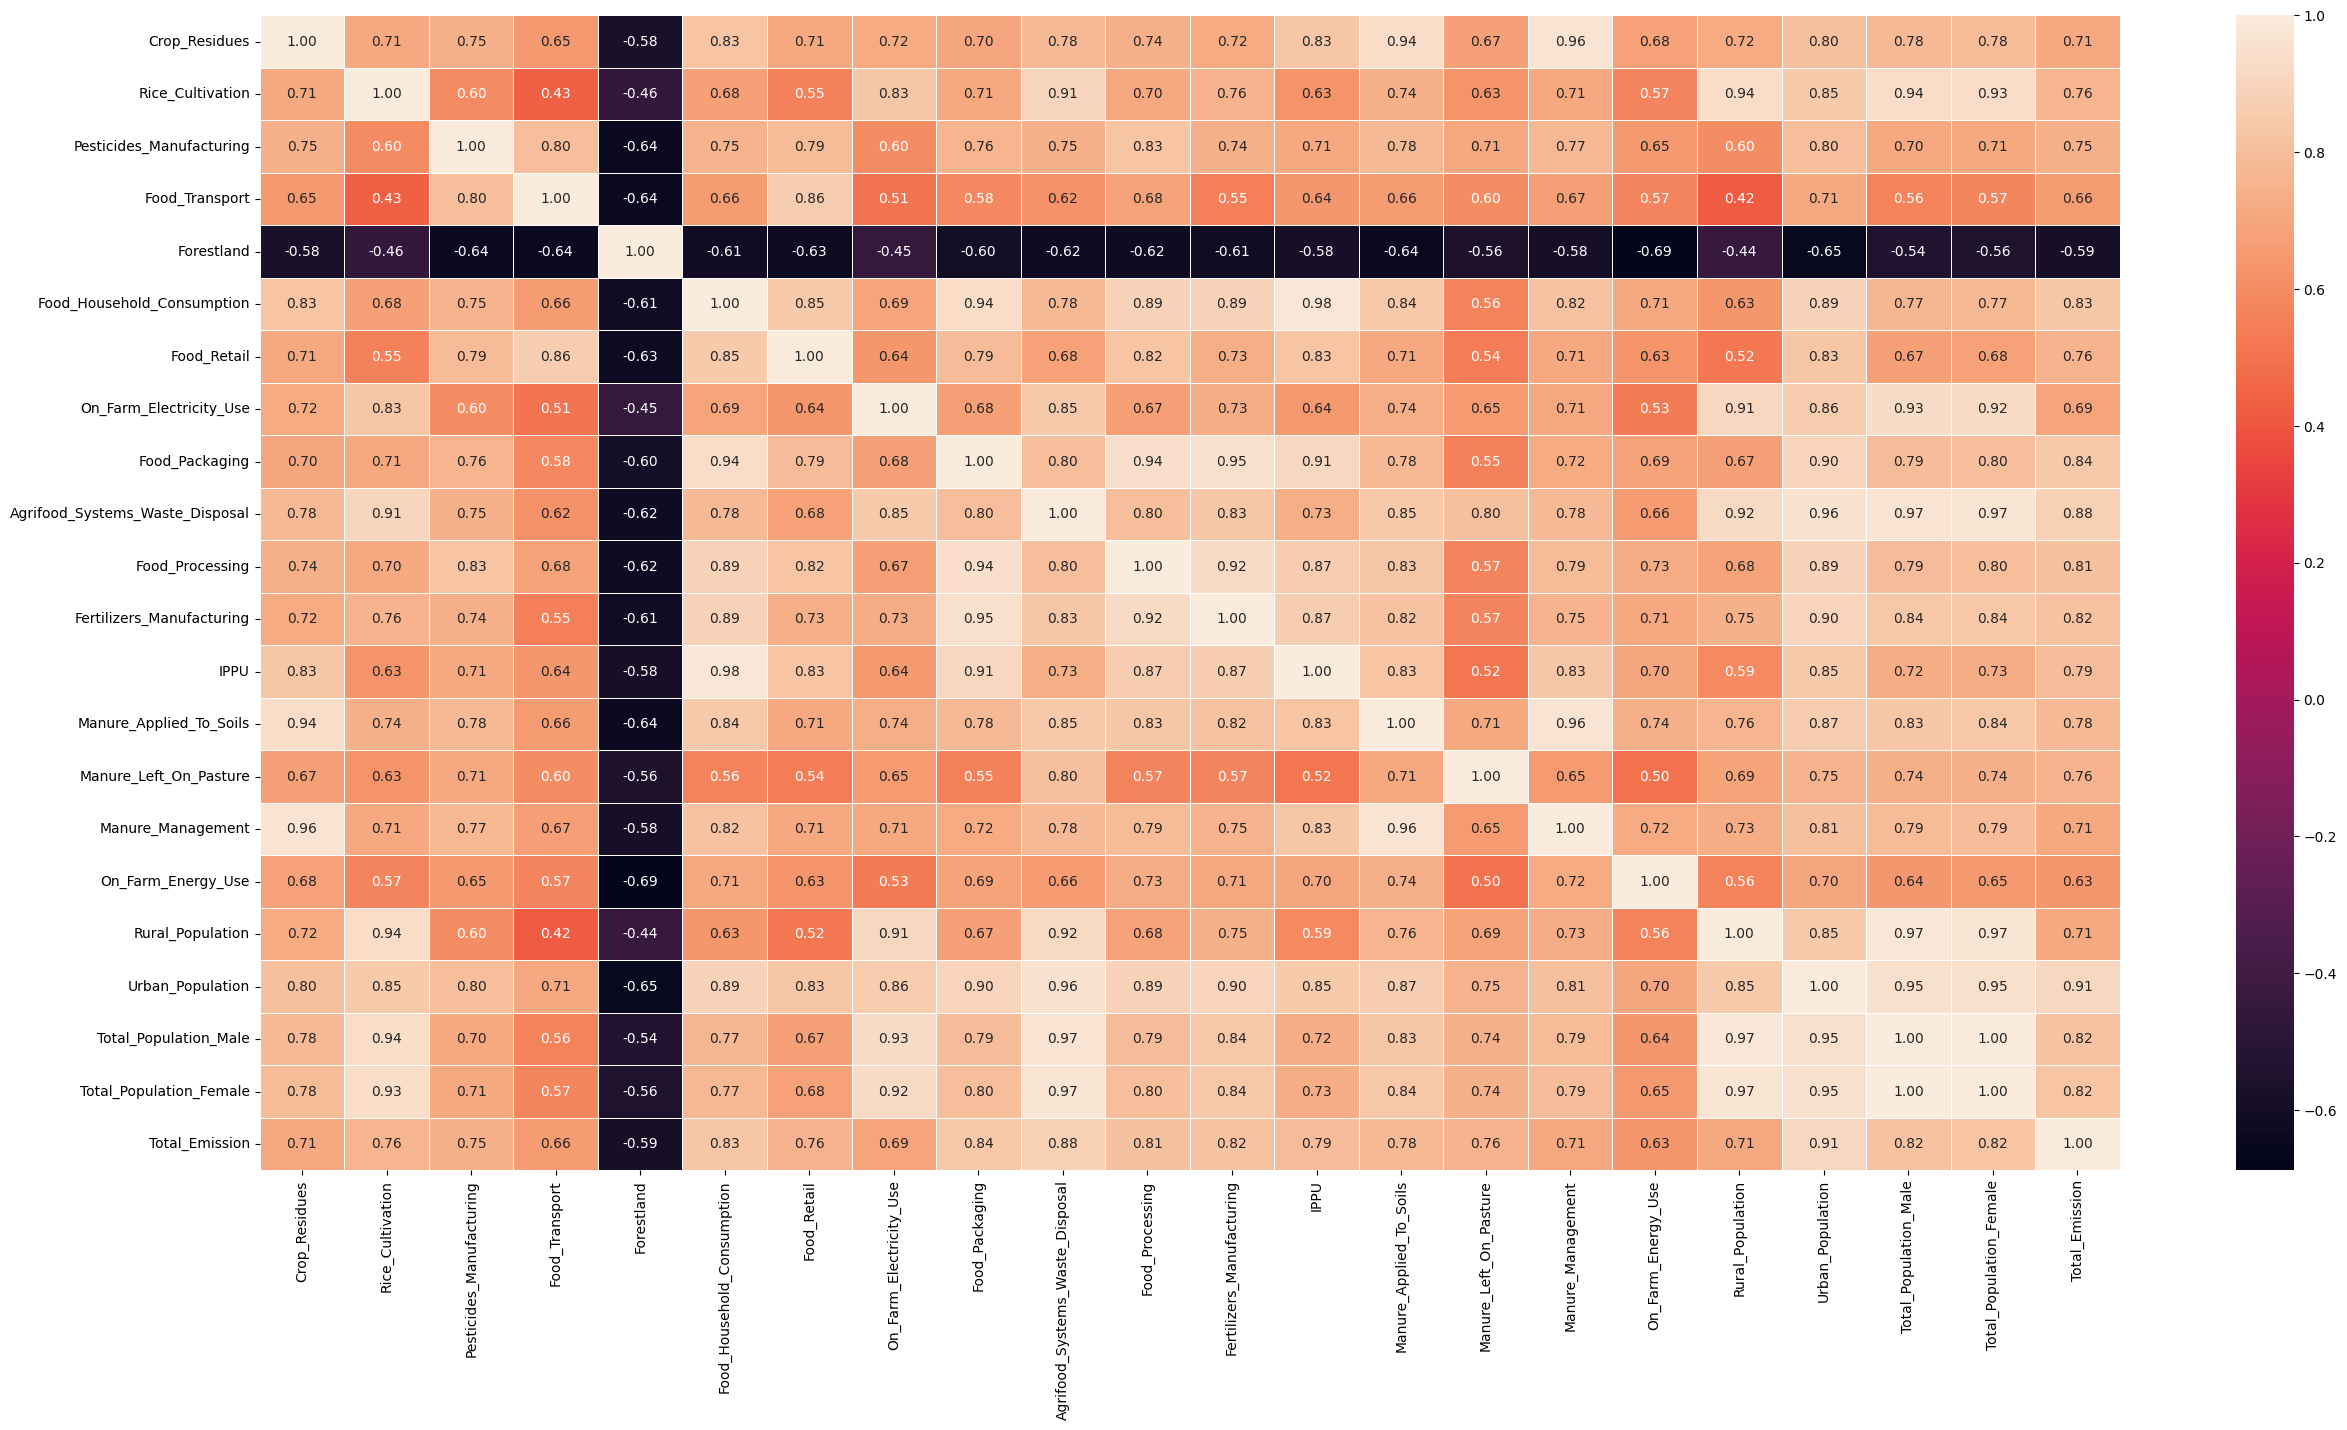

In [ ]:
# What does NOT have correlation with target:
low_corr_cols = ['Area',
                 'Year',
                 'Savanna_Fires',
                 'Forest_Fires',
                 'Drained_Organic_Soils_Co2',
                 'Net_Forest_Conversion',
                 'Fires_In_Organic_Soils',
                 'Fires_In_Humid_Tropical_Forests',
                 'Average_Temperature_C']

corr_df = encoded_df.copy()
corr_df = corr_df.drop(columns = low_corr_cols, axis = 1)

import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(corr_df.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)

In [ ]:
df_features = corr_df.drop('Total_Emission', axis = 1)
corr = df_features.corr()

pairs = []

for i in range(corr.shape[0]):
  for j in range(i + 1, corr.shape[1]):
    if abs(corr.iloc[i, j]) >= 0.85:
      pairs.append((corr.index[i], corr.columns[j]))

drop = set()
for feature1, feature2 in pairs:
  drop.add(feature2)

corr_df = corr_df.drop(columns = drop)
print(f'Dropped Features: {drop}'
      f'\nTotal = {len(drop)}'
      f'\n\nKept Features: {corr_df.columns.tolist()}'
      f'\nTotal = {len(corr_df.columns)}')

Dropped Features: {'Rural_Population', 'Manure_Management', 'Total_Population_Female', 'Food_Retail', 'Food_Packaging', 'Fertilizers_Manufacturing', 'IPPU', 'Manure_Applied_To_Soils', 'Food_Processing', 'Urban_Population', 'Total_Population_Male', 'Agrifood_Systems_Waste_Disposal'}
Total = 12

Kept Features: ['Crop_Residues', 'Rice_Cultivation', 'Pesticides_Manufacturing', 'Food_Transport', 'Forestland', 'Food_Household_Consumption', 'On_Farm_Electricity_Use', 'Manure_Left_On_Pasture', 'On_Farm_Energy_Use', 'Total_Emission']
Total = 10


<Axes: >

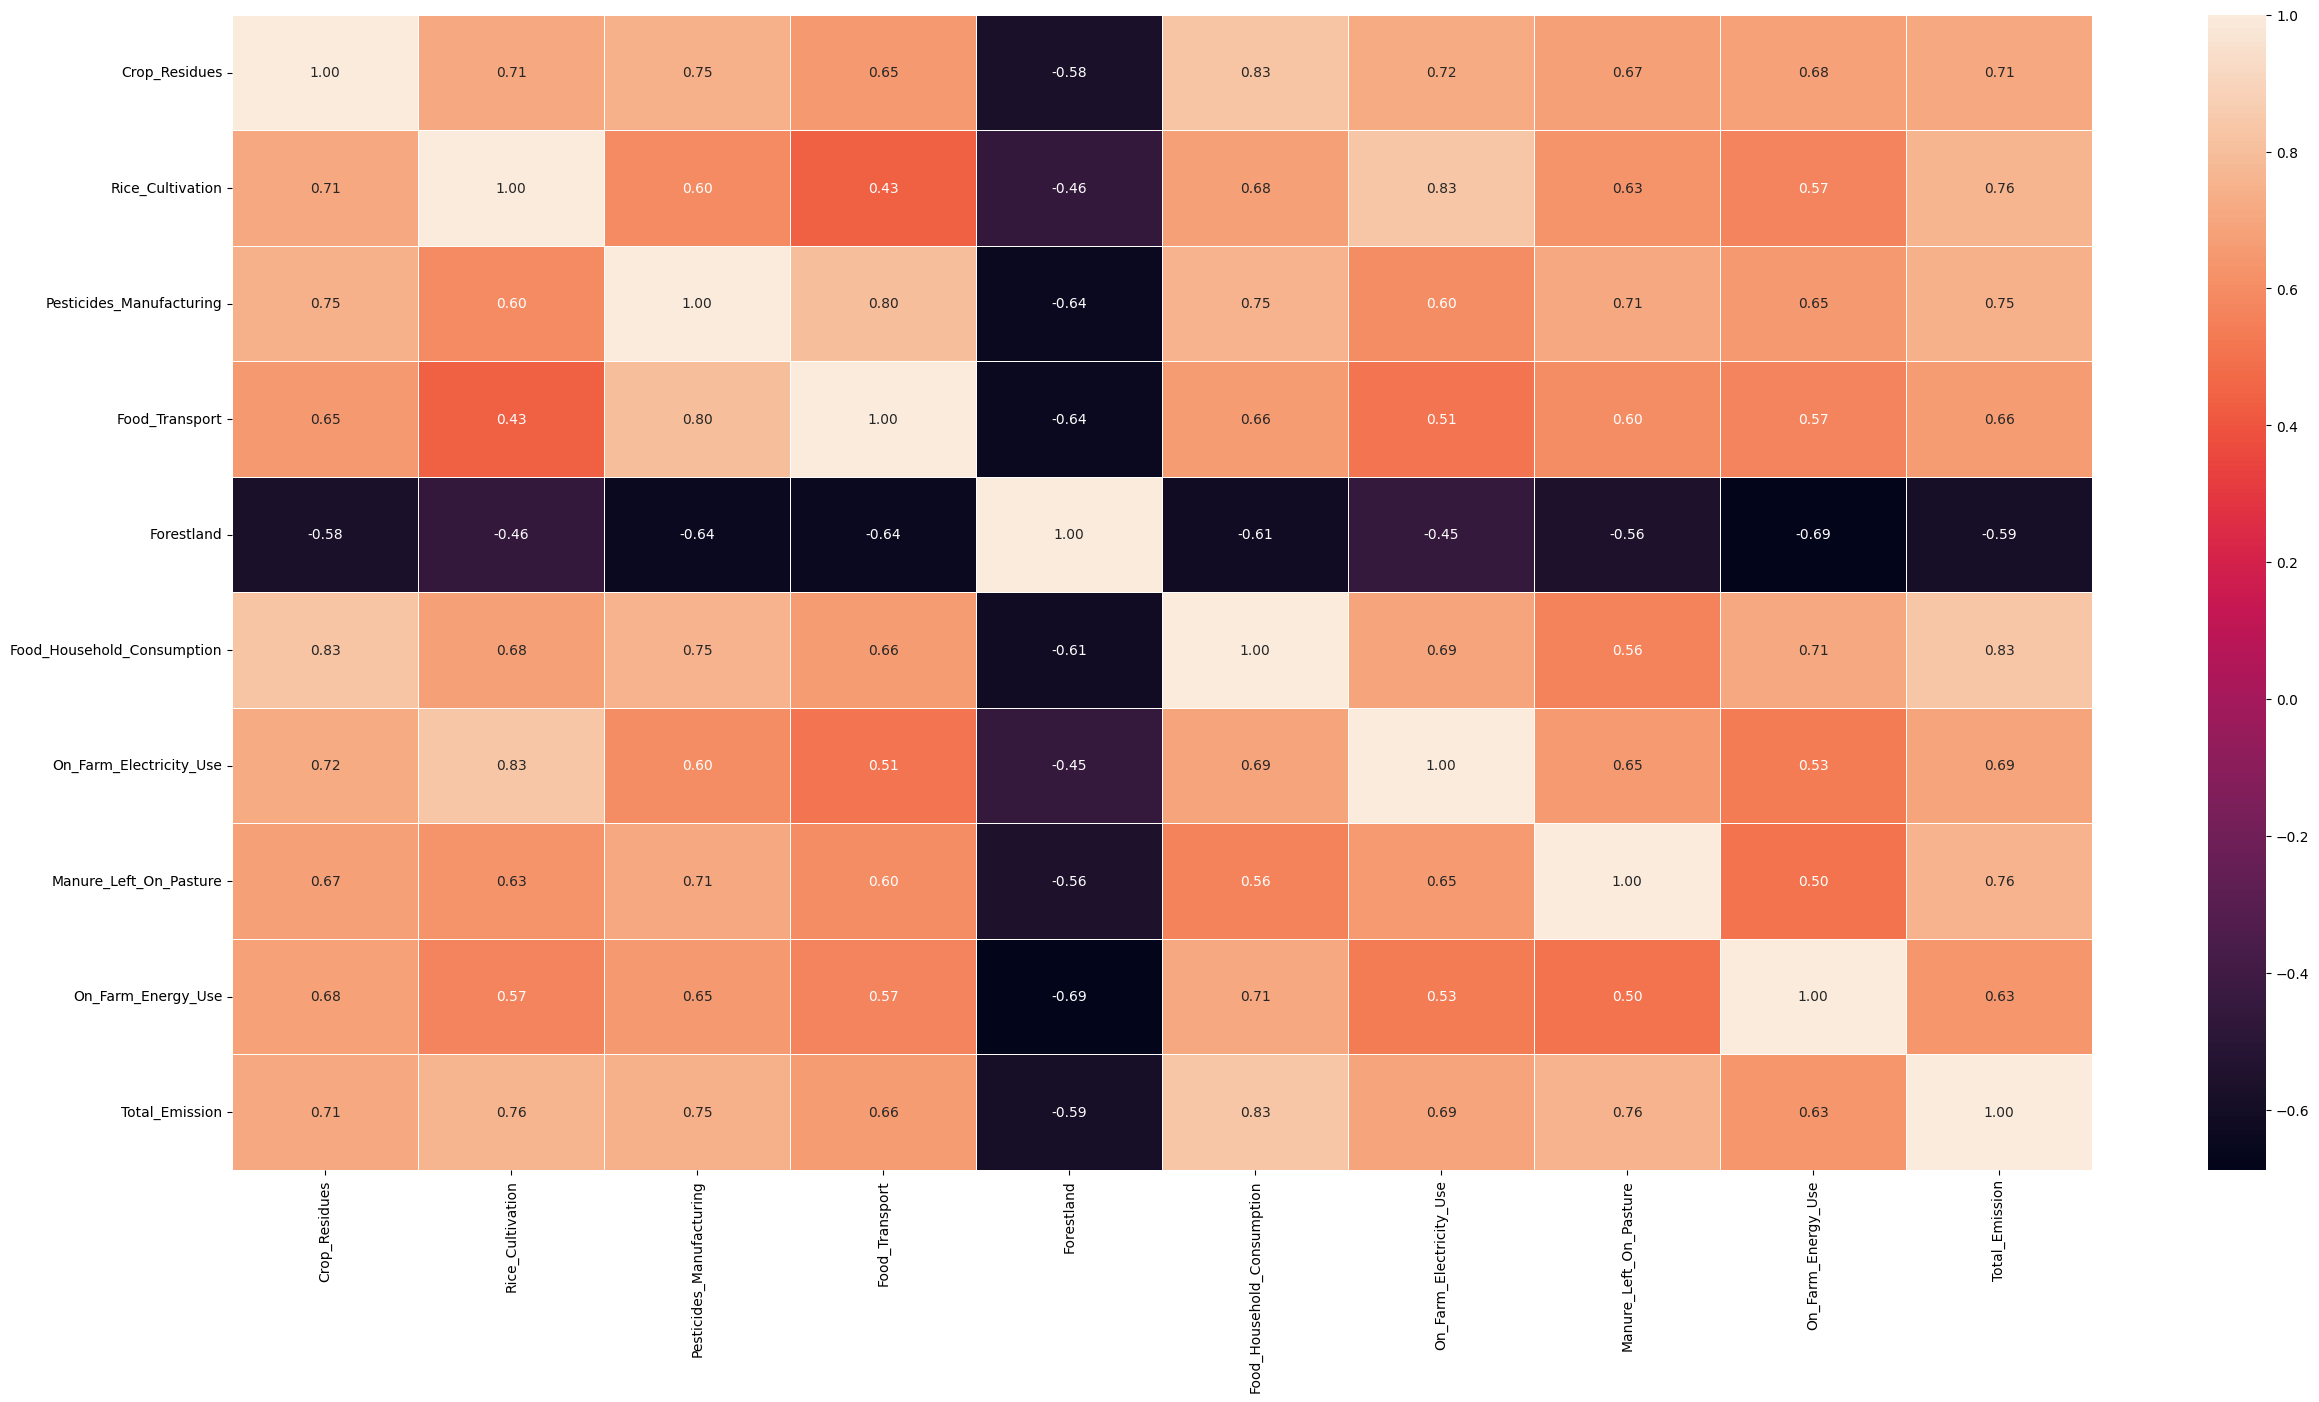

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(corr_df.corr(),
            annot = True,
            fmt = '.2f',
            linewidths = 0.5)

#**Scaling**
For Polynomial Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_df = corr_df.copy()

In [ ]:
sc = StandardScaler()
cols = [col for col in scaled_df.columns if col != 'Total_Emissions']
scaled_df[cols] = sc.fit_transform(scaled_df[cols])

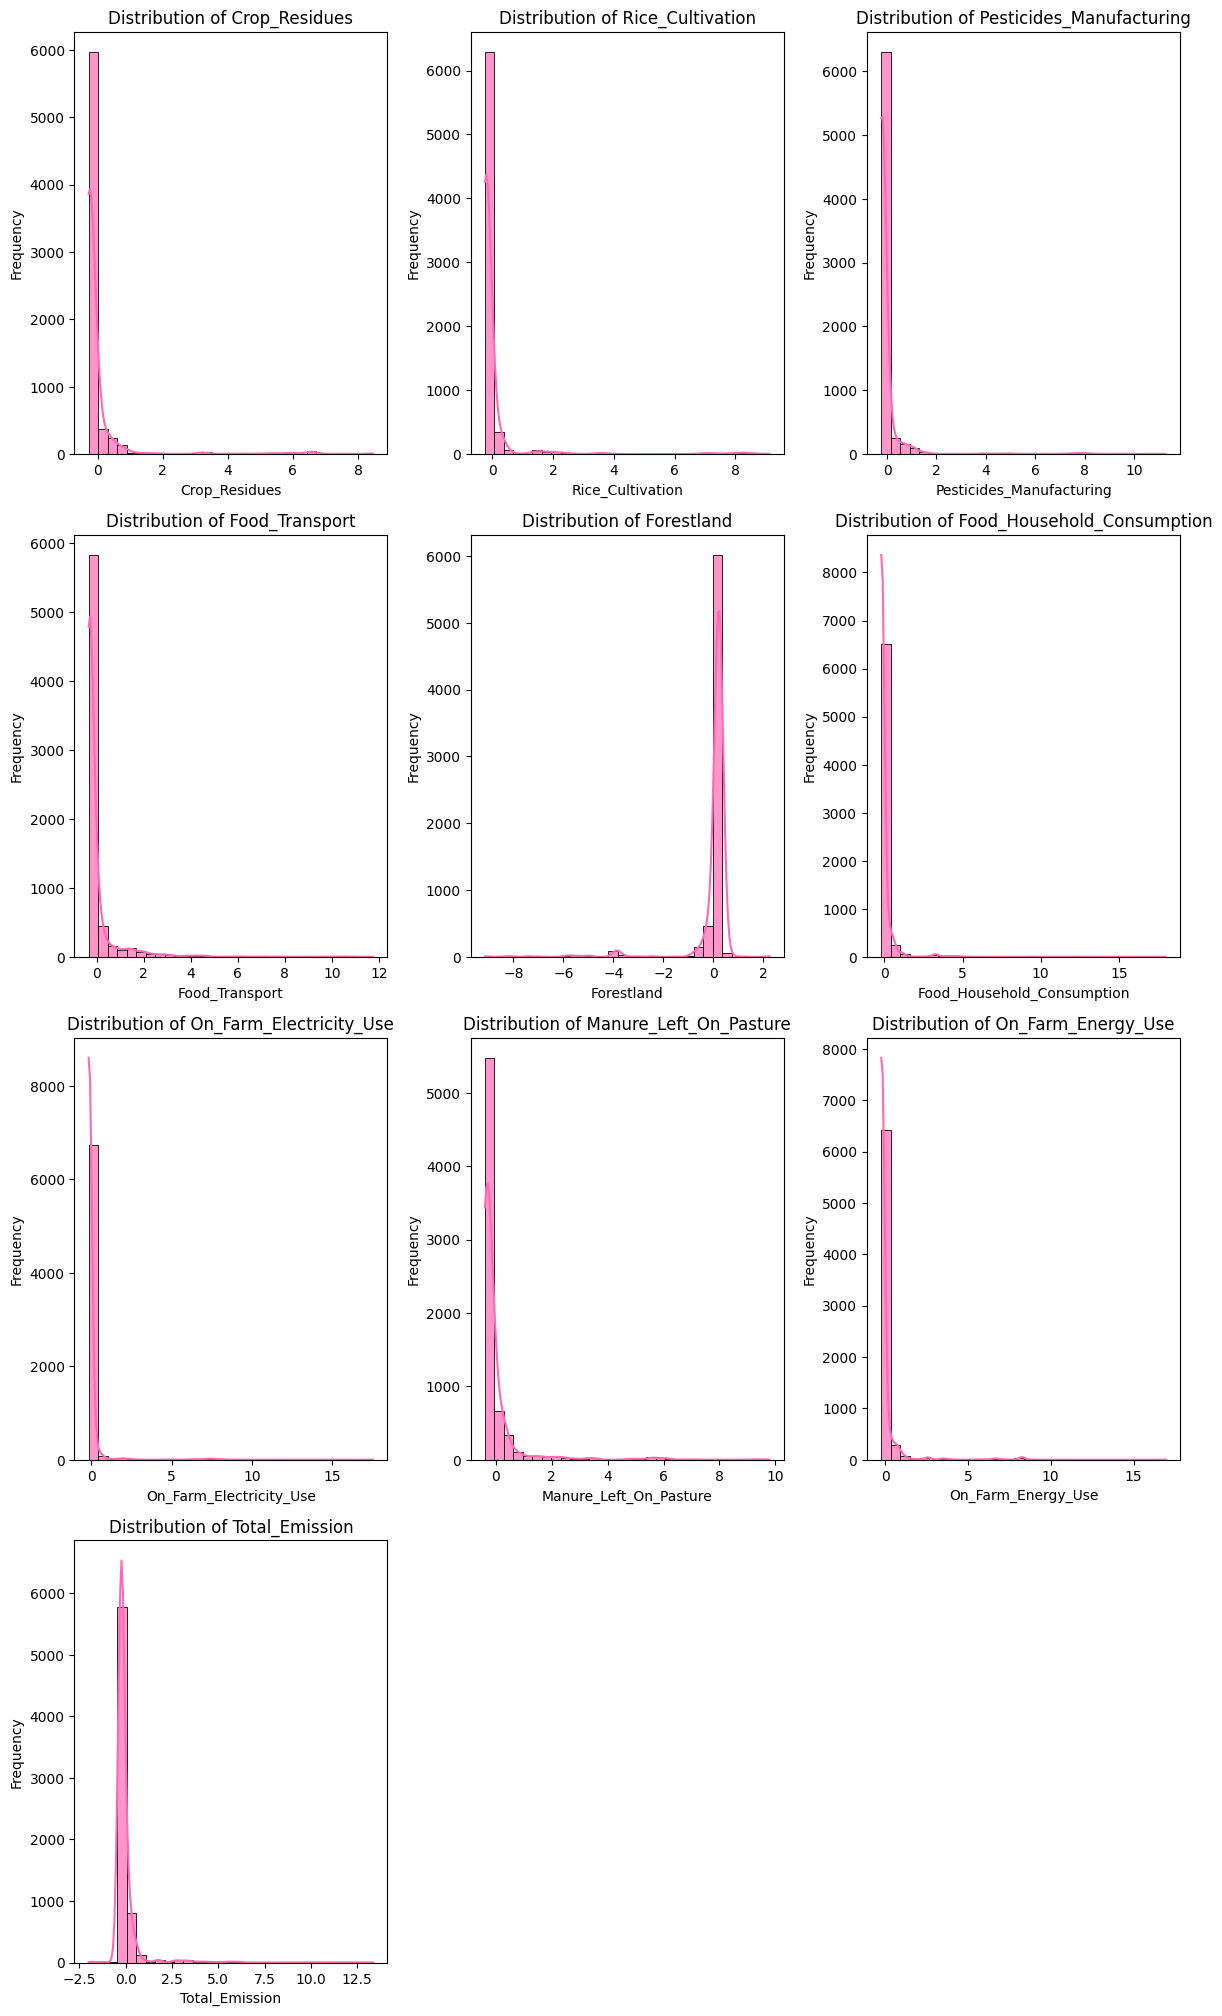

In [ ]:
# Distributions for ALL cols
num = len(numerical_cols) # 3 graphs per row
rows = (num + 3 - 1) // 3 # total rows for subplots

# Creating subplots
fig, axes = plt.subplots(rows, 3, figsize = (12, 5 * rows))
axes = axes.flatten() # flatten = 1D list

# Looping to create the subplots
for i, col in enumerate(scaled_df.columns):
  sns.histplot(scaled_df[col].dropna(), # can't plot nulls
               kde = True, # line for better visualization
                bins = 30,
                ax = axes[i],
                color = 'hotpink',
                edgecolor = 'black',
                alpha = 0.7)
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')

# Removing unused subplots so it looks neat lol
for j in range(i + 1, len(axes)):
  fig.delaxes(axes[j]) # removing the extra axes, again so it's neat

# Printing subplots
plt.tight_layout()
plt.show()

<Axes: >

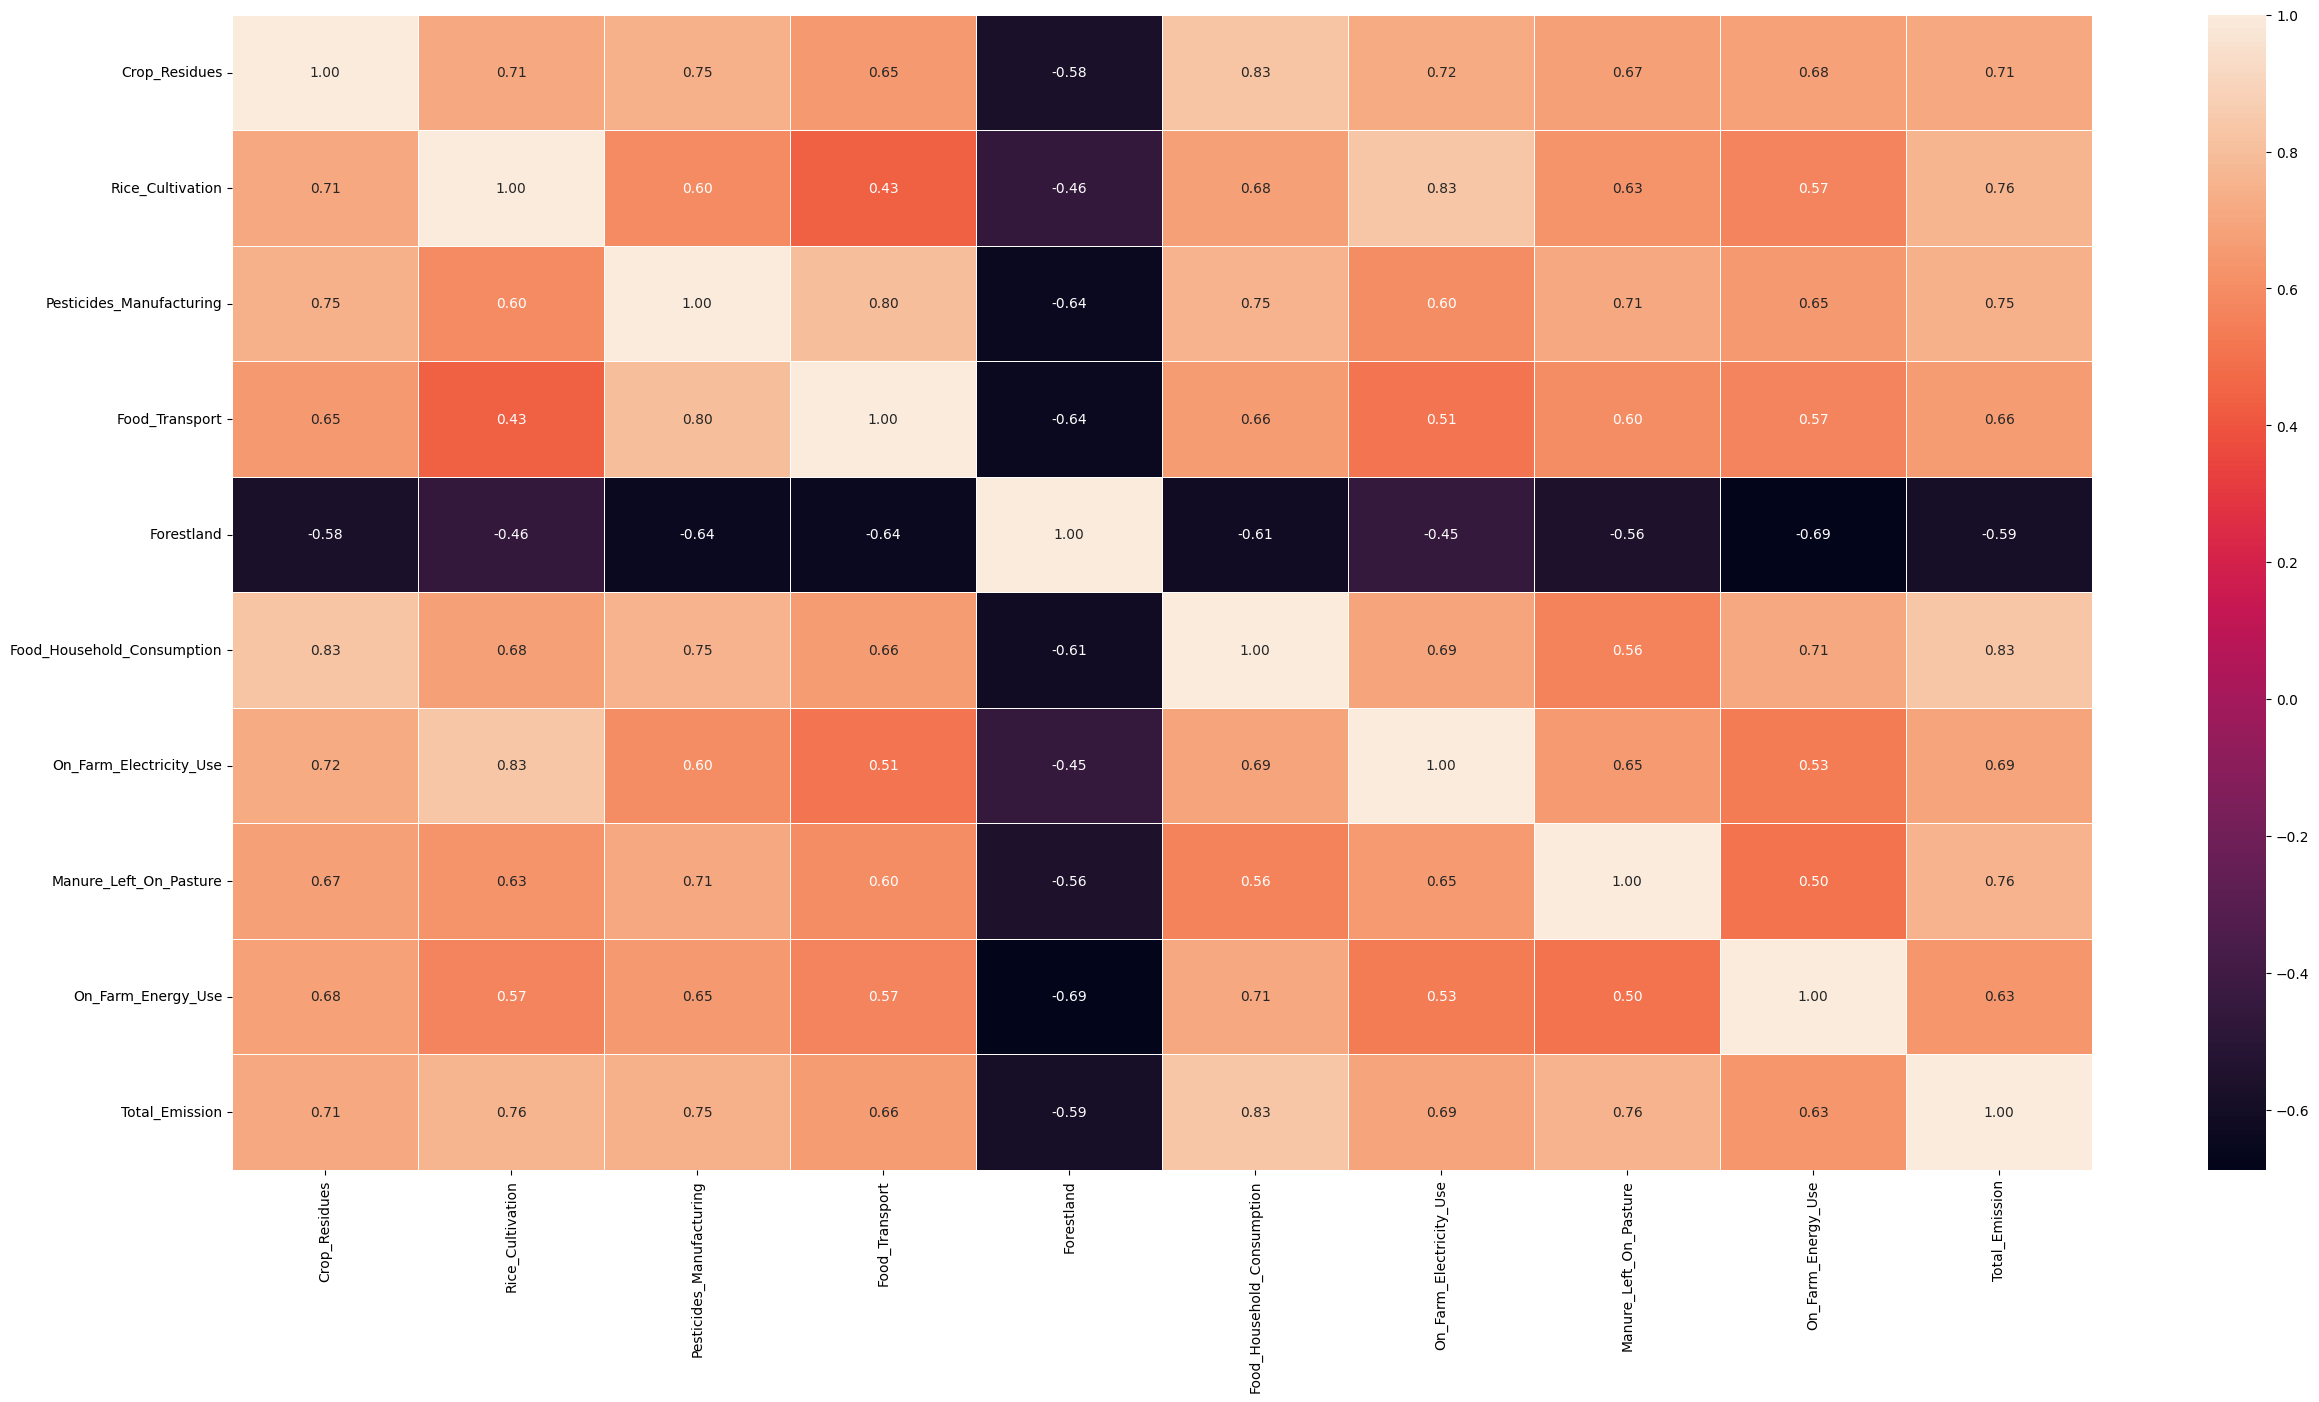

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(scaled_df.corr(), annot = True, fmt = '.2f', linewidths = 0.5)

<Axes: >

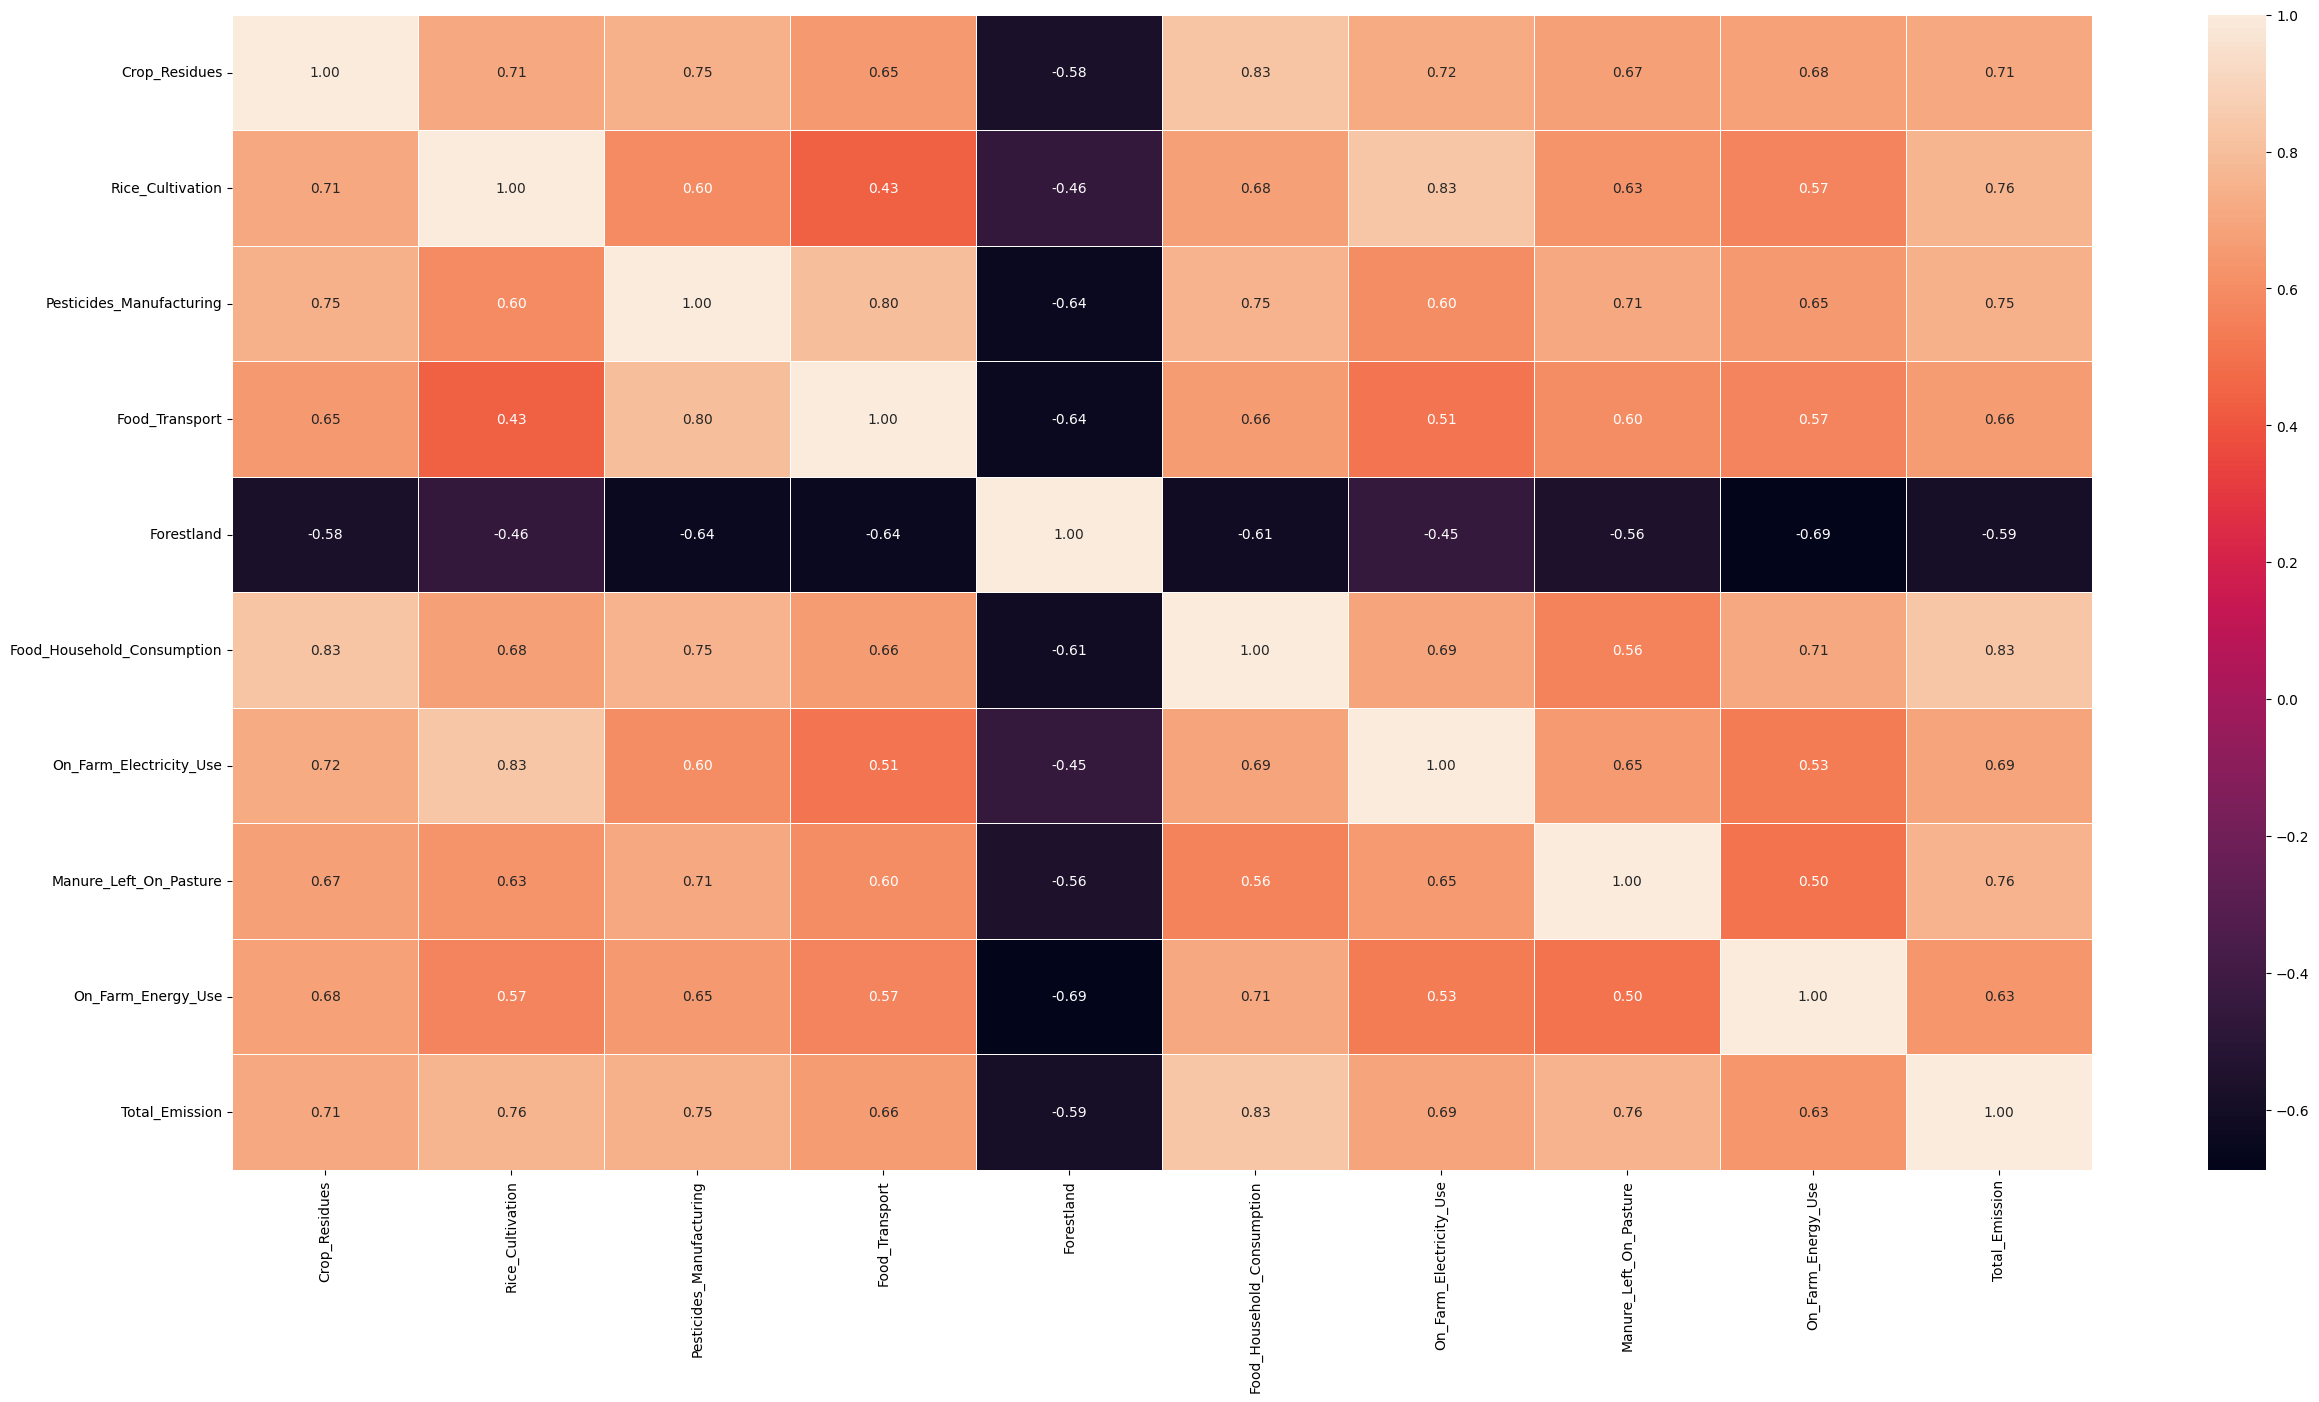

In [ ]:
import seaborn as sns
plt.figure(figsize = (30, 15))
sns.heatmap(corr_df.corr(), annot = True, fmt = '.2f', linewidths = 0.5)

#**Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

#**Scaled Data: Splitting**
Simple Linear Regression, Polynomial Regression, & KNN Regressor**

In [ ]:
# Scaled data
x = scaled_df.drop('Total_Emission', axis = 1) # features
y = scaled_df['Total_Emission'] # target

# Train = 80%, Test = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 42)
  # shuffled bc target is in yearly order

#**Original Data: Splitting**
for Random Forest Regressor, Gradient Boosting, *and* XGBoosting

In [ ]:
# Original data
X = corr_df.drop('Total_Emission', axis = 1) # features
Y = corr_df['Total_Emission'] # target

# Train = 80%, Test = 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 42)
  # shuffled bc target is in yearly order

#**Model Evaluation Functions**

#**1 - Evaluation Metrics**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
eval = pd.DataFrame(columns = ['Model', 'Subset', 'MAE', 'MSE', 'RMSE', 'R2'])

def modelEvaluation(name, subset, y_actual, y_pred):
  global eval
  mae = mean_absolute_error(y_actual, y_pred)
  mse = mean_squared_error(y_actual, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_actual, y_pred)

  results = {
      'Model': name,
      'Subset': subset,
      'MAE': mae,
      'MSE': mse,
      'RMSE': rmse,
      'R2': r2
  }

  results = pd.DataFrame([results])
  eval = pd.concat([eval, results], ignore_index = True)
  return results

#**2 - Actual vs. Prediction**

In [ ]:
def actualVsPred(y_actual, y_pred):
  y_actual = y_actual[:len(y_pred)]

  plt.figure(figsize = (10, 6))
  plt.scatter(range(len(y_actual)), y_actual, alpha = 0.5, color = 'blue', label = 'Actual')
  plt.scatter(range(len(y_pred)), y_pred, alpha = 0.5, color = 'red', label = 'Predicted')
  plt.xlabel('Index')
  plt.ylabel('Values')
  plt.title('Actual Vs. Predicted')
  plt.legend()
  plt.show()

#**3.1 - Coefficient Score**
- Simple Linear Regression

In [ ]:
def coefScore(x_orig, model):
  coef = model.coef_

  if len(coef.shape) > 1:
    coef = coef[0]

  coef_df = pd.DataFrame(coef, index = x_orig.columns, columns = ['Coefficient'])
  coef_df = coef_df.sort_values(by = 'Coefficient', ascending = False)
  return coef_df

#**3.2 - Feature Importance**
- Gradient Boosting, Random Forest Regressor, *and* XGBoosting

In [ ]:
def featureImportance(x_orig, model):
  importance = model.feature_importances_
  importance_df = pd.DataFrame(importance, index = x_orig.columns, columns = ['Importance'])
  importance_df = importance_df.sort_values(by = 'Importance', ascending = False)
  return importance_df

#**4 - Train vs. Test Loss (Parameter Combination)**
How is 'mean_test_score' the same as the validation score?

Source https://github.com/scikit-learn/scikit-learn/discussions/21976
- During each cv split (which there are 3), the training data is split into a training subset and a validation subset (this evaluates the the model for that **specific** split)
- So the 'mean_test_score' here is **NOT the final evaluation**
- As we'll see later in the models section, cv_results_ has a param called 'param_mean_test_score' which shows the test score of the model at **each** parameter combination > it is **NOT** the final score.

**And that is why 'mean_test_score' is considered the validation score.**


In [ ]:
def paramLoss(model, name):
  # Results from grid search
  cv_results = model.cv_results_

  # Train & validation scores
  train_scores = cv_results['mean_train_score']
  validation_scores = cv_results['mean_test_score']

  # Getting parameter combo scores
  param_combo = model.cv_results_['params']

  # Numbers the combo for easier viewing
  combo = [f'Combo {i + 1}' for i in range(len(param_combo))]

  # Puts them in a df
  param_df = pd.DataFrame(param_combo, index = combo)

  # Plotting
  plt.figure(figsize = (12, 6))
  plt.plot(range(len(train_scores)), -(train_scores), marker = 'o', label = 'Training MSE', linestyle = '-', color = 'blue')
  plt.plot(range(len(validation_scores)), -(validation_scores), marker = 'x', label = 'Validation MSE', linestyle = '--', color = 'red')

  plt.xticks(ticks = range(len(combo)), labels = combo, rotation = 45)
  plt.title(f'Train vs Test Loss ({name})')
  plt.xlabel('Parameter Combination')
  plt.ylabel('Mean Squared Error (MSE)')
  plt.legend()
  plt.yscale('log')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

  print(f'\nParameter Combos: \n{param_df}')

#**5.1 - Train vs. Test MSE (Split Loop)**

In [ ]:
def splitLoss(model, x, y, name):
  test_sizes = np.linspace(0.1, 0.9, 9)
  train_loss = []
  test_loss = []

  for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))

  plt.figure(figsize = (10, 6))
  plt.plot(1 - test_sizes, train_loss, marker = 'o', label = 'Training Loss', linestyle = '-', color = 'blue')
  plt.plot(1 - test_sizes, test_loss, marker = 'x', label = 'Testing Loss', linestyle = '--', color = 'red')

  plt.title(f'Training vs Test Loss ({name})')
  plt.xlabel('Train Size') # 1 - test size = train size
  plt.ylabel('Mean Squared Error (MSE)')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()

#**5.2 - Train vs. Test RMSE (Split Loop)**

In [ ]:
def splitLossSqrt(model, x, y, name):
  test_sizes = np.linspace(0.1, 0.9, 9)
  train_loss = []
  test_loss = []

  for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_loss.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_loss.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

  plt.figure(figsize = (10, 6))
  plt.plot(1 - test_sizes, train_loss, marker = 'o', label = 'Training Loss', linestyle = '-', color = 'blue')
  plt.plot(1 - test_sizes, test_loss, marker = 'x', label = 'Testing Loss', linestyle = '--', color = 'red')

  plt.title(f'Training vs Test Loss ({name})')
  plt.xlabel('Train Size') # 1 - test size = train size
  plt.ylabel('Root Mean Squared Error (RMSE)')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()

#**6 - Train vs. Validation MSE (Split Loop, Cross Val Predict)**

Source https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

In [ ]:
from sklearn.model_selection import cross_val_predict

def splitLossValPred(model, x, y, name):
  test_sizes = np.linspace(0.1, 0.9, 9)
  train_loss = []
  validation_loss = []

  for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

    y_train_pred = model.predict(x_train)
    train_loss.append(mean_squared_error(y_train, y_train_pred))

    y_val_pred = cross_val_predict(model, x_train, y_train, cv = 5)
    validation_loss.append(mean_squared_error(y_train, y_val_pred))

  plt.figure(figsize = (10, 6))
  plt.plot(1 - test_sizes, train_loss, marker = 'o', label = 'Training Loss', linestyle = '-', color = 'blue')
  plt.plot(1 - test_sizes, validation_loss, marker = 'x', label = 'Validation Loss', linestyle = '--', color = 'red')

  plt.title(f'Training vs Validation Loss ({name})')
  plt.xlabel('Train Size') # 1 - test size = train size
  plt.ylabel('Mean Squared Error (MSE)')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()

#**Models**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import time

#**1 - Polynomial Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
poly_grid = {'poly__degree': [2, 3, 4, 5],}

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr_poly', LinearRegression())])
poly_cv = GridSearchCV(pipeline,
                       poly_grid,
                       scoring = 'neg_mean_squared_error',
                       return_train_score = True,
                       cv = 5,
                       refit = True)

start_time = time.time()
poly_cv.fit(x_train, y_train)
end_time = time.time()
print('Best Polynomial Regression Parameters: ', poly_cv.best_params_)

# Prediction
y_pred_poly = poly_cv.predict(x_test)
y_pred_poly_train = poly_cv.predict(x_train)

Best Polynomial Regression Parameters:  {'poly__degree': 2}


In [ ]:
print(f"\n{modelEvaluation('Polynomial Regression', 'Test', y_test, y_pred_poly)}"
      f"\n\n{modelEvaluation('Polynomial Regression', 'Train', y_train, y_pred_poly_train)}"
      f"\n\nTraining Time: {(end_time - start_time):.2f} seconds")


                   Model Subset       MAE       MSE      RMSE        R2
0  Polynomial Regression   Test  0.104325  0.070715  0.265922  0.946719

                   Model Subset       MAE       MSE      RMSE        R2
0  Polynomial Regression  Train  0.092395  0.047175  0.217198  0.948609

Training Time: 40.99 seconds


<ipython-input-50-fdd0c1ee600f>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  eval = pd.concat([eval, results], ignore_index = True)


In [ ]:
# Ensure i have the right param names
print(poly_cv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_poly__degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


In [ ]:
polyResults = poly_cv.cv_results_
polyResults_df = pd.DataFrame({
    'param_poly__degree': polyResults['param_poly__degree'],
    'mean_test_score': polyResults['mean_test_score'],
    'mean_train_score': polyResults['mean_train_score'],
    'std_test_score': polyResults['std_test_score'],
    'rank_test_score': polyResults['rank_test_score']
})

polyResults_df = polyResults_df.sort_values(by = 'rank_test_score').reset_index(drop = True)
polyResults_df

param_poly__degree  mean_test_score  mean_train_score  std_test_score  \
0                  2    -5.555950e-02         -0.046580    8.400600e-03   
1                  3    -1.314020e+00         -0.030694    1.737077e+00   
2                  4    -2.572801e+06         -0.022795    3.010392e+06   
3                  5    -2.938627e+16         -0.000962    5.357048e+16   

   rank_test_score  
0                1  
1                2  
2                3  
3                4

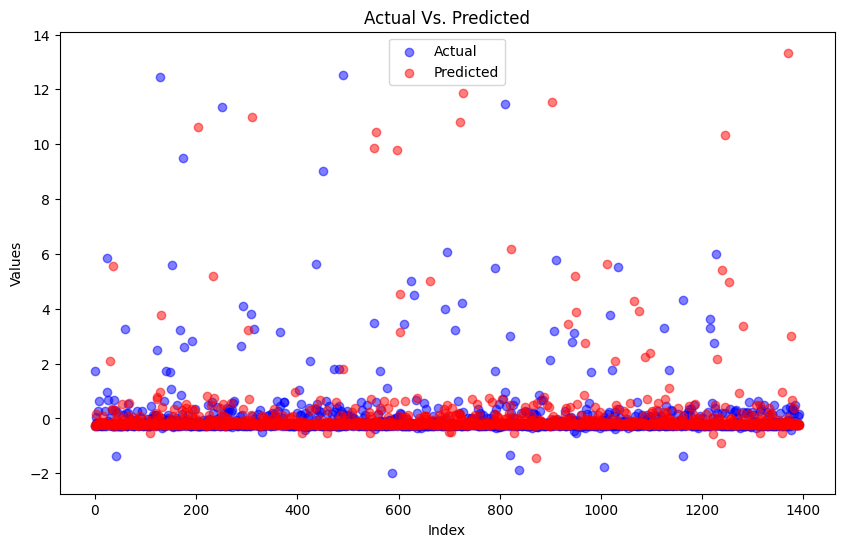

In [ ]:
actualVsPred(y_train, y_pred_poly)

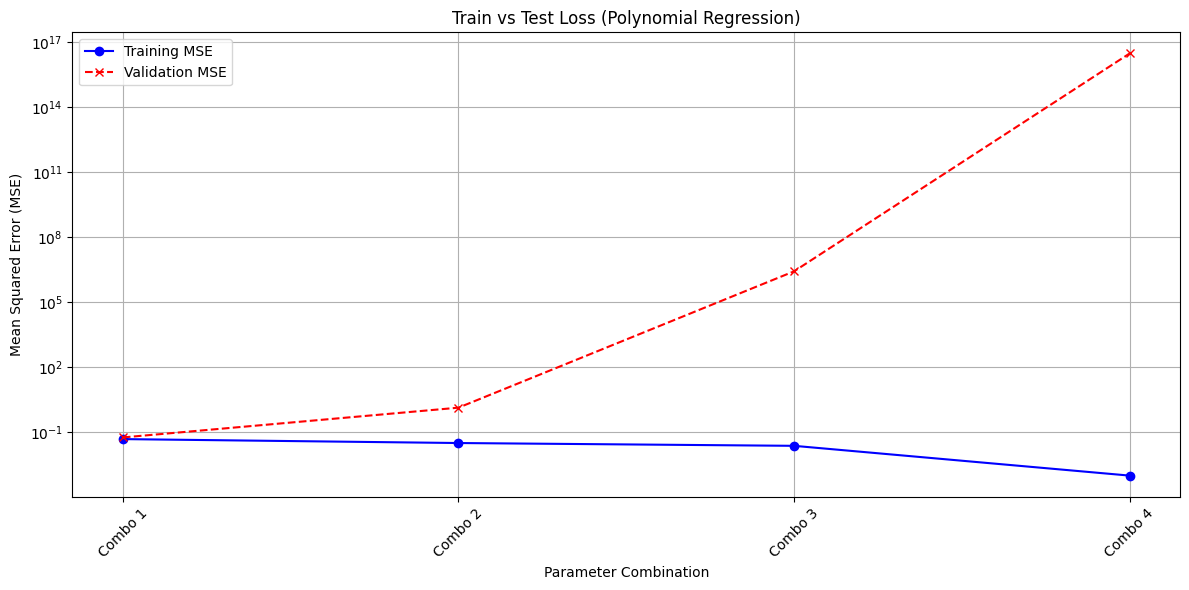


Parameter Combos: 
         poly__degree
Combo 1             2
Combo 2             3
Combo 3             4
Combo 4             5


In [ ]:
paramLoss(poly_cv, 'Polynomial Regression')

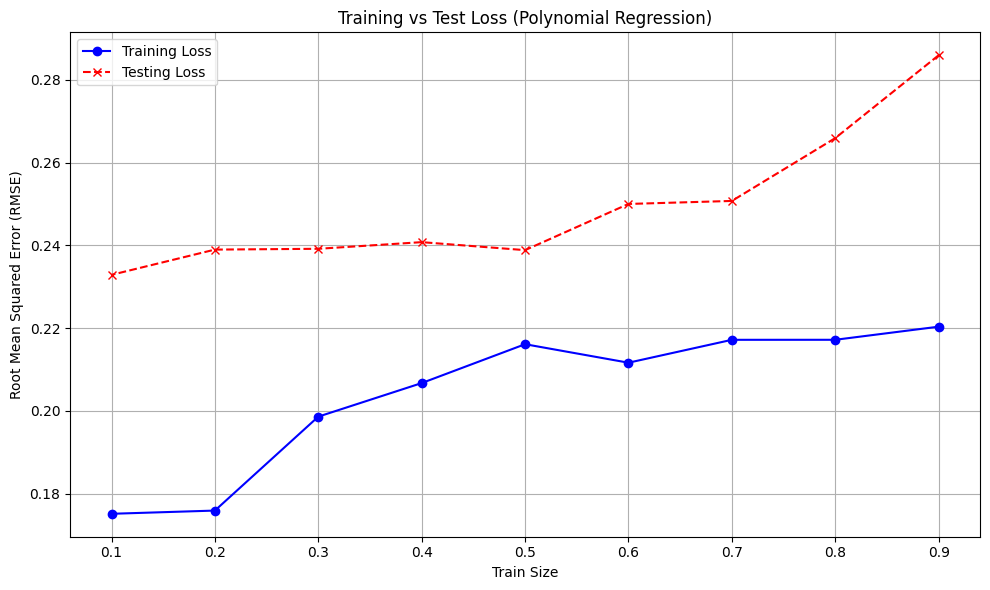

In [ ]:
splitLossSqrt(poly_cv.best_estimator_, x, y, 'Polynomial Regression')

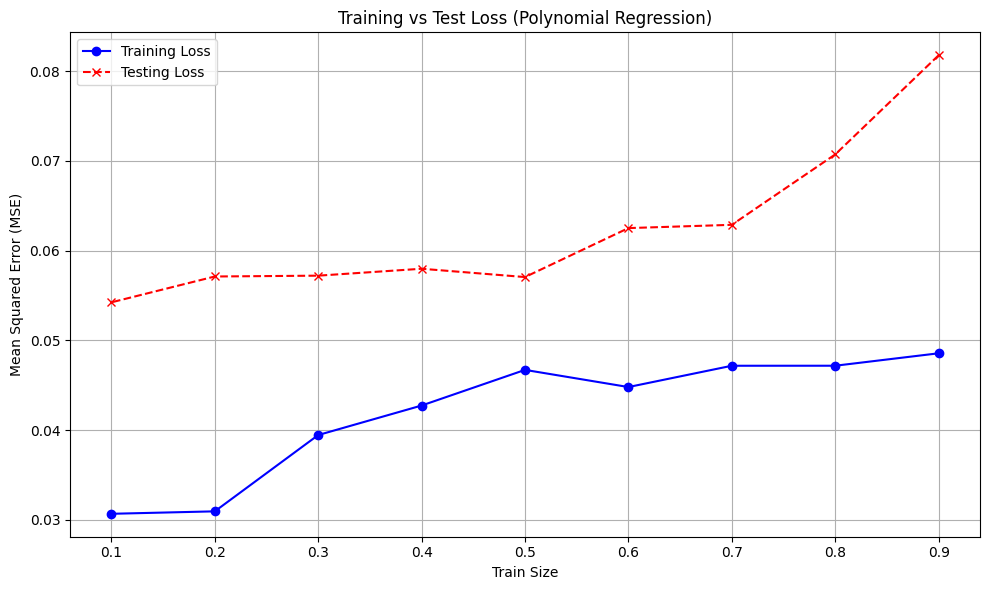

In [ ]:
splitLoss(poly_cv.best_estimator_, x, y, 'Polynomial Regression')

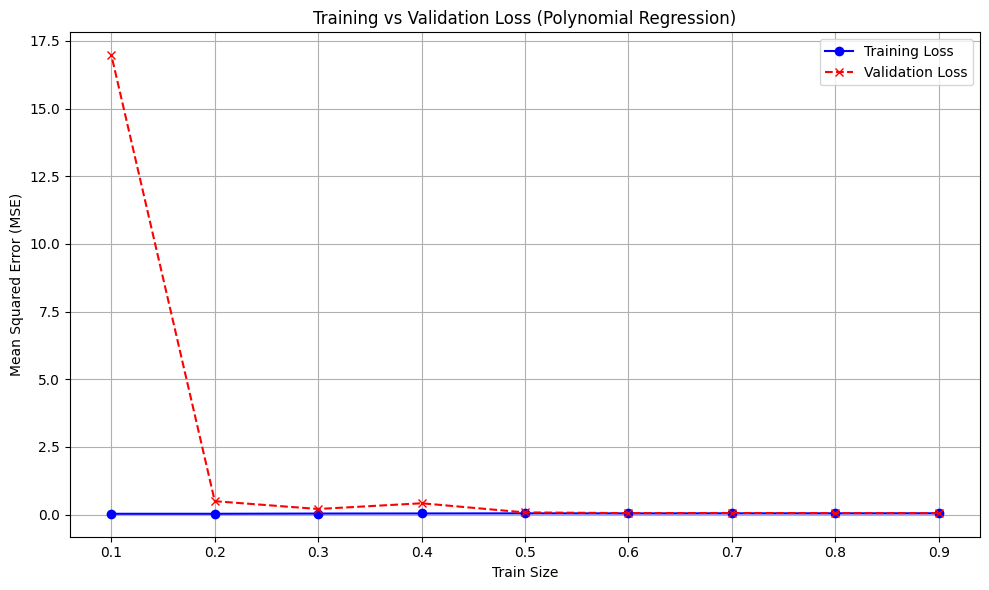

In [ ]:
splitLossValPred(poly_cv.best_estimator_, x, y, 'Polynomial Regression')

In [ ]:
eval[eval['Model'].str.contains('Polynomial')]

Model Subset       MAE       MSE      RMSE        R2
0  Polynomial Regression   Test  0.104325  0.070715  0.265922  0.946719
1  Polynomial Regression  Train  0.092395  0.047175  0.217198  0.948609

#**2 - Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [ ]:
gb = GradientBoostingRegressor()
gb_cv = GridSearchCV(gb, gb_grid,
                     scoring = 'neg_mean_squared_error',
                     return_train_score = True,
                     cv = 5,
                     n_jobs = -1)

start_time = time.time()
gb_cv.fit(X_train, Y_train)
end_time = time.time()
print('Best Gradient Boosting Parameters:', gb_cv.best_params_)

Y_pred_gb = gb_cv.predict(X_test)
Y_pred_gb_train = gb_cv.predict(X_train)

Best Gradient Boosting Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
# Evaluate the model
print(f"\n{modelEvaluation('Gradient Boosting', 'Test', Y_test, Y_pred_gb)}"
      f"\n\n{modelEvaluation('Gradient Boosting', 'Train', Y_train, Y_pred_gb_train)}"
      f"\n\nTraining Time: {(end_time - start_time):.2f} seconds")


               Model Subset          MAE           MSE          RMSE        R2
0  Gradient Boosting   Test  7918.266123  1.535919e+09  39190.806214  0.977796

               Model Subset          MAE           MSE         RMSE        R2
0  Gradient Boosting  Train  2643.859036  1.567172e+07  3958.752696  0.999672

Training Time: 287.14 seconds


In [ ]:
# Ensure i have the right param names
print(gb_cv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


In [ ]:
gbResults = gb_cv.cv_results_
gbResults_df = pd.DataFrame({
    'param_learning_rate': gbResults['param_learning_rate'],
    'param_max_depth': gbResults['param_max_depth'],
    'param_n_estimators': gbResults['param_n_estimators'],
    'mean_train_score': gbResults['mean_train_score'],
    'mean_test_score': gbResults['mean_test_score'],
    'std_test_score': gbResults['std_test_score'],
    'rank_test_score': gbResults['rank_test_score']
})

gbResults_df = gbResults_df.sort_values(by = 'rank_test_score').reset_index(drop = True)
gbResults_df

param_learning_rate param_max_depth param_n_estimators  mean_train_score  \
0                  0.2               5                150     -1.189139e+07   
1                  0.2               7                150     -9.724478e+05   
2                  0.1               5                150     -4.434965e+07   
3                  0.2               7                100     -2.844284e+06   
4                  0.1               7                150     -5.919903e+06   
5                  0.2               7                 50     -1.489960e+07   
6                  0.1               5                100     -8.255352e+07   
7                  0.1               7                100     -1.453700e+07   
8                  0.2               5                100     -2.417327e+07   
9                  0.2               5                 50     -7.784077e+07   
10                 0.1               7                 50     -9.527461e+07   
11                 0.2               3                150     -1.370112e+08   
12                 0.1               5                 50     -2.905839e+08   
13                 0.2               3                100     -2.192461e+08   
14                 0.1               3                150     -2.974346e+08   
15                 0.1               3                100     -4.545353e+08   
16                 0.2               3                 50     -4.603998e+08   
17                 0.1               3                 50     -9.668439e+08   
18                0.01               7                150     -2.913970e+09   
19                0.01               5                150     -3.856652e+09   
20                0.01               3                150     -5.609860e+09   
21                0.01               7                100     -7.069994e+09   
22                0.01               5                100     -8.145593e+09   
23                0.01               3                100     -9.961636e+09   
24                0.01               7                 50     -1.807212e+10   
25                0.01               5                 50     -1.902229e+10   
26                0.01               3                 50     -2.061192e+10   

    mean_test_score  std_test_score  rank_test_score  
0     -4.612947e+08    2.371713e+08                1  
1     -4.934036e+08    1.796741e+08                2  
2     -4.989453e+08    2.668345e+08                3  
3     -5.013787e+08    2.013454e+08                4  
4     -5.256863e+08    1.833641e+08                5  
5     -5.343527e+08    1.717998e+08                6  
6     -5.348882e+08    2.462867e+08                7  
7     -5.457604e+08    2.259306e+08                8  
8     -5.461137e+08    3.046220e+08                9  
9     -5.831146e+08    2.709657e+08               10  
10    -5.972021e+08    1.956320e+08               11  
11    -7.225918e+08    2.671504e+08               12  
12    -7.310023e+08    2.657478e+08               13  
13    -7.499386e+08    2.218748e+08               14  
14    -7.930263e+08    1.948948e+08               15  
15    -9.159254e+08    1.646560e+08               16  
16    -1.000806e+09    2.267360e+08               17  
17    -1.447973e+09    9.728572e+07               18  
18    -3.398059e+09    5.852746e+08               19  
19    -4.228421e+09    7.555751e+08               20  
20    -6.013126e+09    1.110500e+09               21  
21    -7.474581e+09    1.370700e+09               22  
22    -8.415377e+09    1.493526e+09               23  
23    -1.032588e+10    2.047771e+09               24  
24    -1.834715e+10    3.573375e+09               25  
25    -1.917165e+10    3.766430e+09               26  
26    -2.084048e+10    4.219821e+09               27

In [ ]:
featureImportance(X_test, gb_cv.best_estimator_)

Importance
Manure_Left_On_Pasture        0.637602
Food_Household_Consumption    0.121852
Rice_Cultivation              0.081225
Food_Transport                0.076754
Forestland                    0.026836
On_Farm_Electricity_Use       0.017350
On_Farm_Energy_Use            0.014690
Crop_Residues                 0.013126
Pesticides_Manufacturing      0.010565

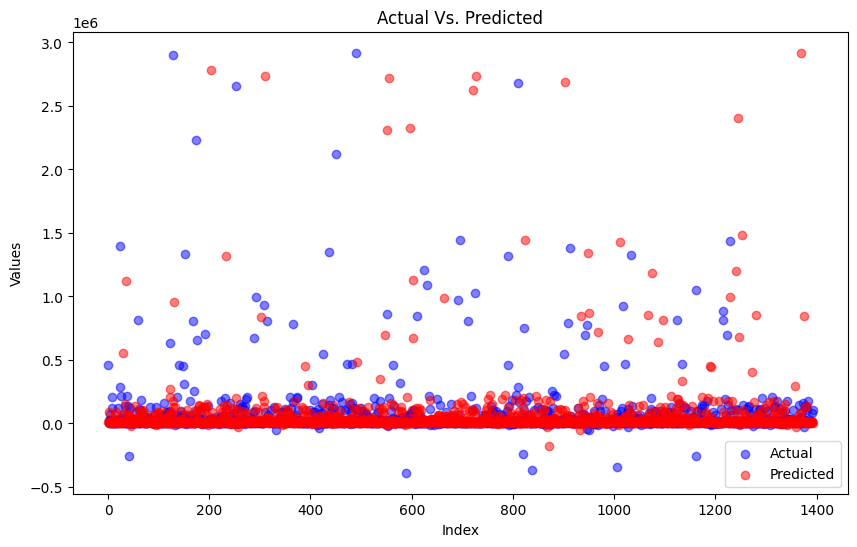

In [ ]:
actualVsPred(Y_train, Y_pred_gb)

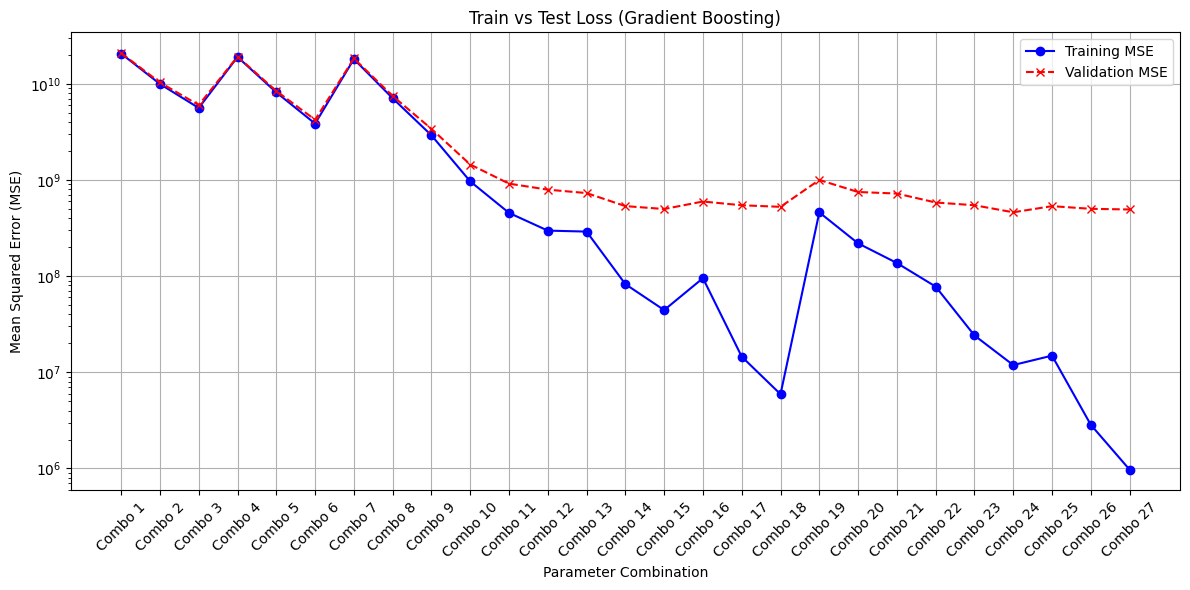


Parameter Combos: 
          learning_rate  max_depth  n_estimators
Combo 1            0.01          3            50
Combo 2            0.01          3           100
Combo 3            0.01          3           150
Combo 4            0.01          5            50
Combo 5            0.01          5           100
Combo 6            0.01          5           150
Combo 7            0.01          7            50
Combo 8            0.01          7           100
Combo 9            0.01          7           150
Combo 10           0.10          3            50
Combo 11           0.10          3           100
Combo 12           0.10          3           150
Combo 13           0.10          5            50
Combo 14           0.10          5           100
Combo 15           0.10          5           150
Combo 16           0.10          7            50
Combo 17           0.10          7           100
Combo 18           0.10          7           150
Combo 19           0.20          3            50


In [ ]:
paramLoss(gb_cv, 'Gradient Boosting')

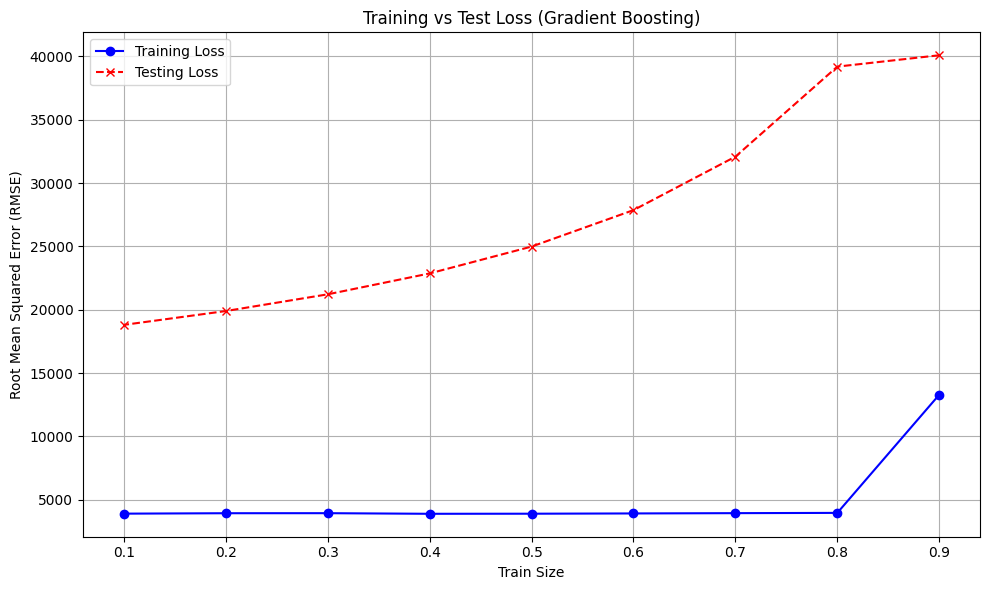

In [ ]:
splitLossSqrt(gb_cv.best_estimator_, X, Y, 'Gradient Boosting')

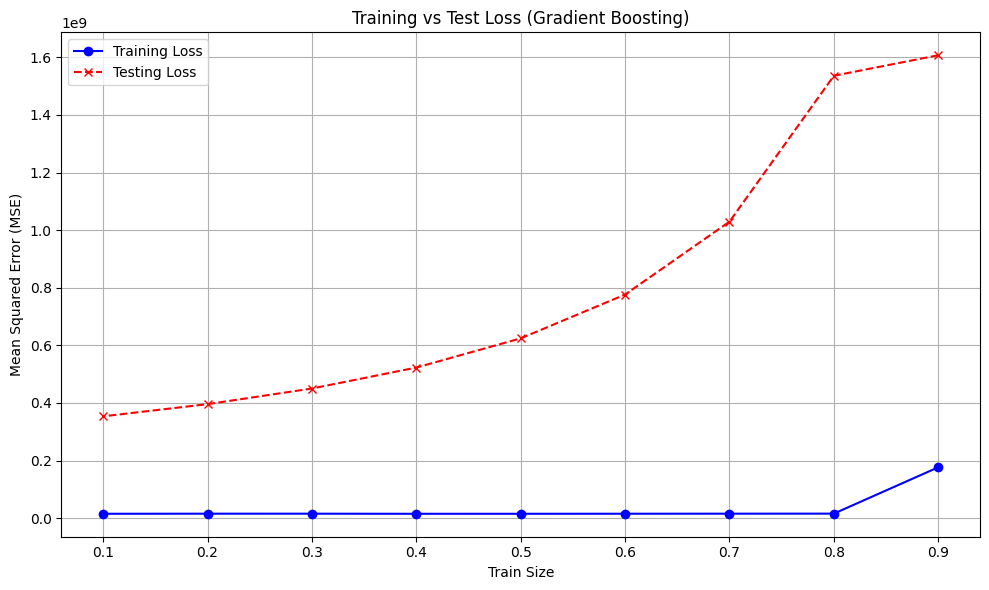

In [ ]:
splitLoss(gb_cv.best_estimator_, X, Y, 'Gradient Boosting')

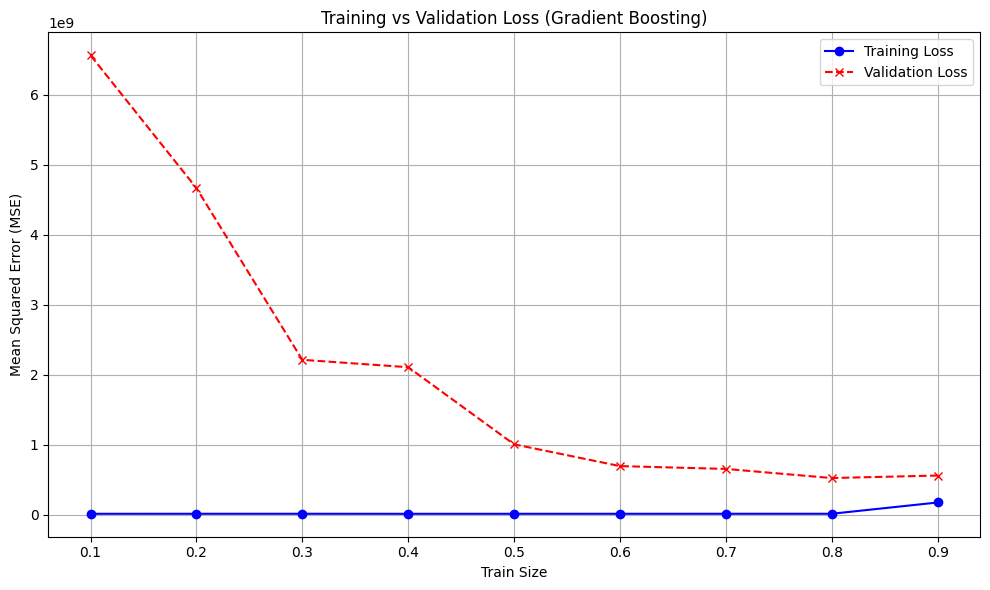

In [ ]:
splitLossValPred(gb_cv.best_estimator_, X, Y, 'Gradient Boosting')

In [ ]:
eval[eval['Model'].str.contains('Gradient Boosting')]

Model Subset          MAE           MSE          RMSE        R2
2  Gradient Boosting   Test  7918.266123  1.535919e+09  39190.806214  0.977796
3  Gradient Boosting  Train  2643.859036  1.567172e+07   3958.752696  0.999672

#**3 - Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_grid = {'n_estimators': [50, 100, 150],
          'max_depth': [3, 5, 7]}

In [ ]:
rf = RandomForestRegressor()
rf_cv = GridSearchCV(rf,
                     rf_grid,
                     scoring = 'neg_mean_squared_error',
                     return_train_score = True,
                     cv = 5,
                     n_jobs = -1)

start_time = time.time()
rf_cv.fit(X_train, Y_train)
end_time = time.time()
print('Best Random Forest Parameters:', rf_cv.best_params_)

Y_pred_rf = rf_cv.predict(X_test)
Y_pred_rf_train = rf_cv.predict(X_train)

Best Random Forest Parameters: {'max_depth': 7, 'n_estimators': 150}


In [ ]:
# Evaluate the model
print(f"\n{modelEvaluation('Random Forest', 'Test', Y_test, Y_pred_rf)}"
      f"\n\n{modelEvaluation('Random Forest', 'Train', Y_train, Y_pred_rf_train)}"
      f"\n\nTraining Time: {(end_time - start_time):.2f} seconds")


           Model Subset           MAE           MSE          RMSE        R2
0  Random Forest   Test  19422.321002  2.318512e+09  48150.929143  0.966483

           Model Subset           MAE           MSE          RMSE        R2
0  Random Forest  Train  15628.385679  8.514845e+08  29180.208129  0.982203

Training Time: 70.14 seconds


In [ ]:
# Ensure i have the right param names
print(rf_cv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


In [ ]:
rfResults = rf_cv.cv_results_
rfResults_df = pd.DataFrame({
    'param_n_estimators': rfResults['param_n_estimators'],
    'param_max_depth': rfResults['param_max_depth'],
    'mean_train_score': rfResults['mean_train_score'],
    'mean_test_score': rfResults['mean_test_score'],
    'std_test_score': rfResults['std_test_score'],
    'rank_test_score': rfResults['rank_test_score']
})

rfResults_df = rfResults_df.sort_values(by = 'rank_test_score').reset_index(drop = True)
rfResults_df

param_n_estimators param_max_depth  mean_train_score  mean_test_score  \
0                150               7     -8.091729e+08    -1.260029e+09   
1                 50               7     -8.123192e+08    -1.281323e+09   
2                100               7     -8.114573e+08    -1.284279e+09   
3                150               5     -1.859987e+09    -2.259279e+09   
4                100               5     -1.931983e+09    -2.328997e+09   
5                 50               5     -1.914891e+09    -2.347590e+09   
6                100               3     -4.191434e+09    -4.512613e+09   
7                150               3     -4.225773e+09    -4.608777e+09   
8                 50               3     -4.247656e+09    -4.613917e+09   

   std_test_score  rank_test_score  
0    9.944403e+07                1  
1    1.258639e+08                2  
2    9.698524e+07                3  
3    3.594008e+08                4  
4    3.542977e+08                5  
5    3.178755e+08                6  
6    5.369915e+08                7  
7    5.834406e+08                8  
8    5.927490e+08                9

In [ ]:
featureImportance(X_test, rf_cv.best_estimator_)

Importance
Manure_Left_On_Pasture        0.654805
Food_Household_Consumption    0.128769
Rice_Cultivation              0.084992
Food_Transport                0.062049
Forestland                    0.022496
On_Farm_Energy_Use            0.022115
Crop_Residues                 0.009295
On_Farm_Electricity_Use       0.008040
Pesticides_Manufacturing      0.007440

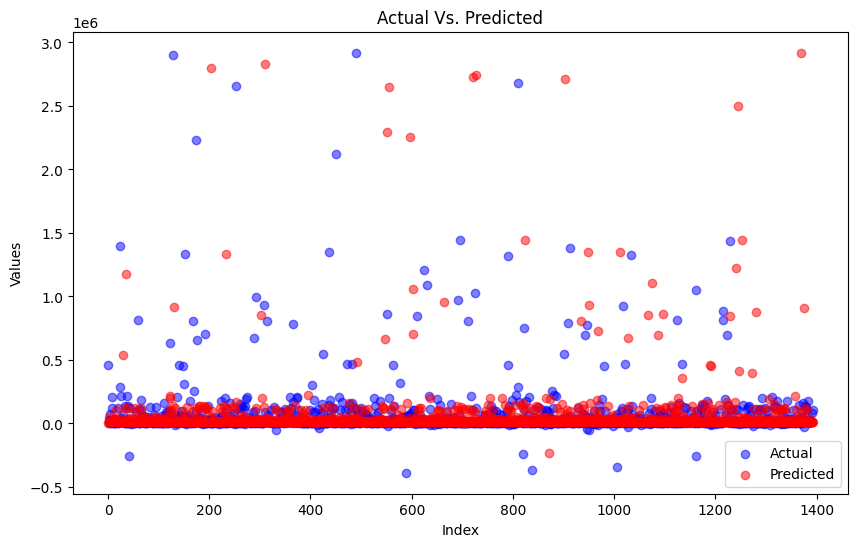

In [ ]:
actualVsPred(Y_train, Y_pred_rf)

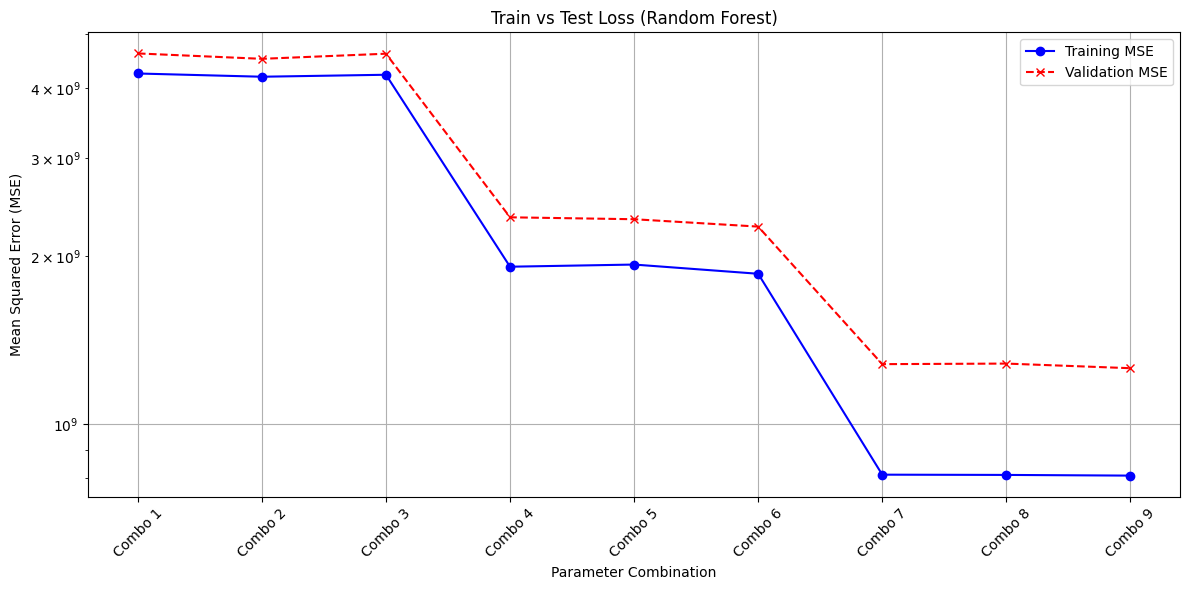


Parameter Combos: 
         max_depth  n_estimators
Combo 1          3            50
Combo 2          3           100
Combo 3          3           150
Combo 4          5            50
Combo 5          5           100
Combo 6          5           150
Combo 7          7            50
Combo 8          7           100
Combo 9          7           150


In [ ]:
paramLoss(rf_cv, 'Random Forest')

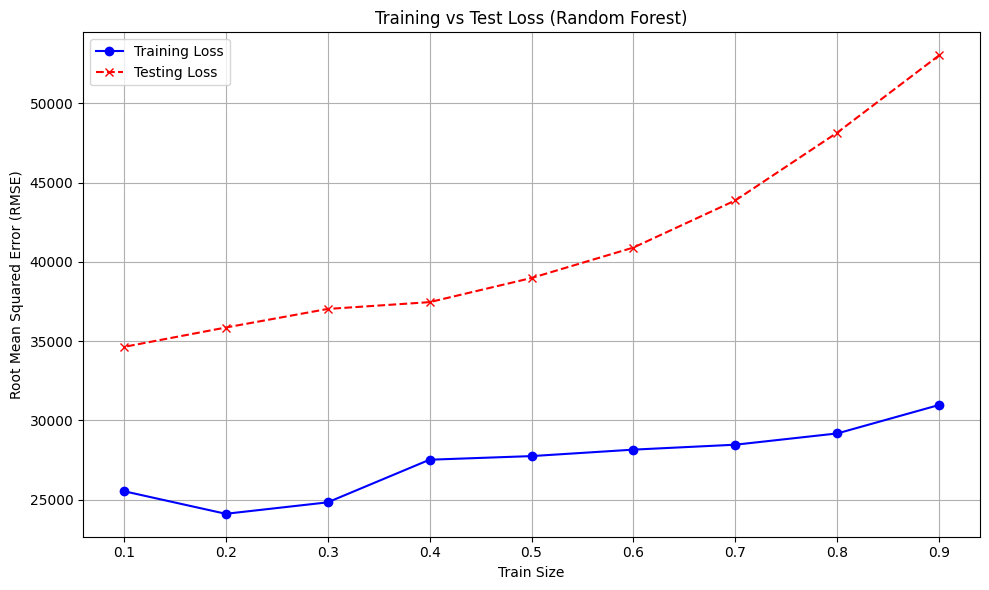

In [ ]:
splitLossSqrt(rf_cv.best_estimator_, X, Y, 'Random Forest')

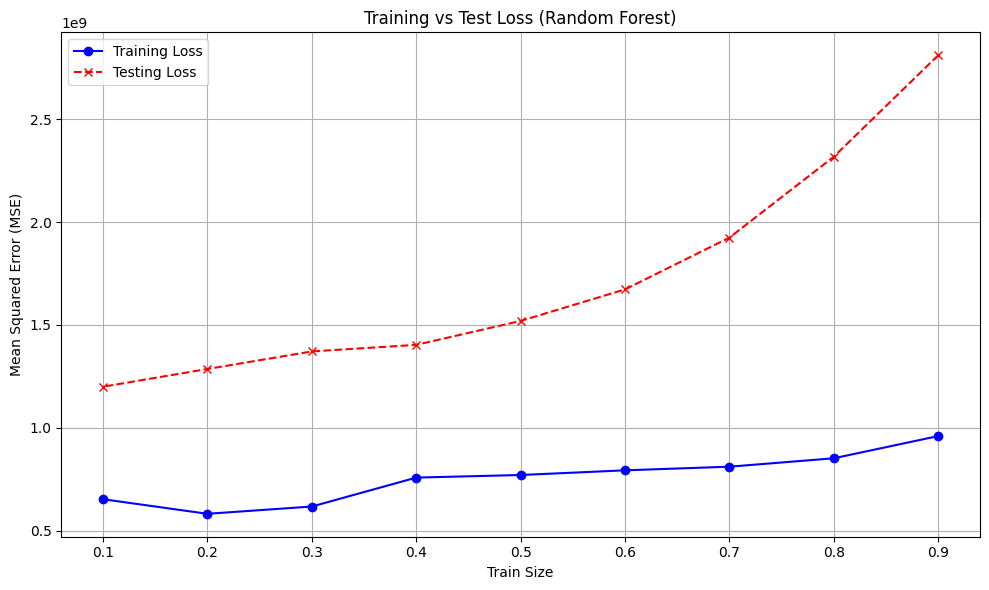

In [ ]:
splitLoss(rf_cv.best_estimator_, X, Y, 'Random Forest')

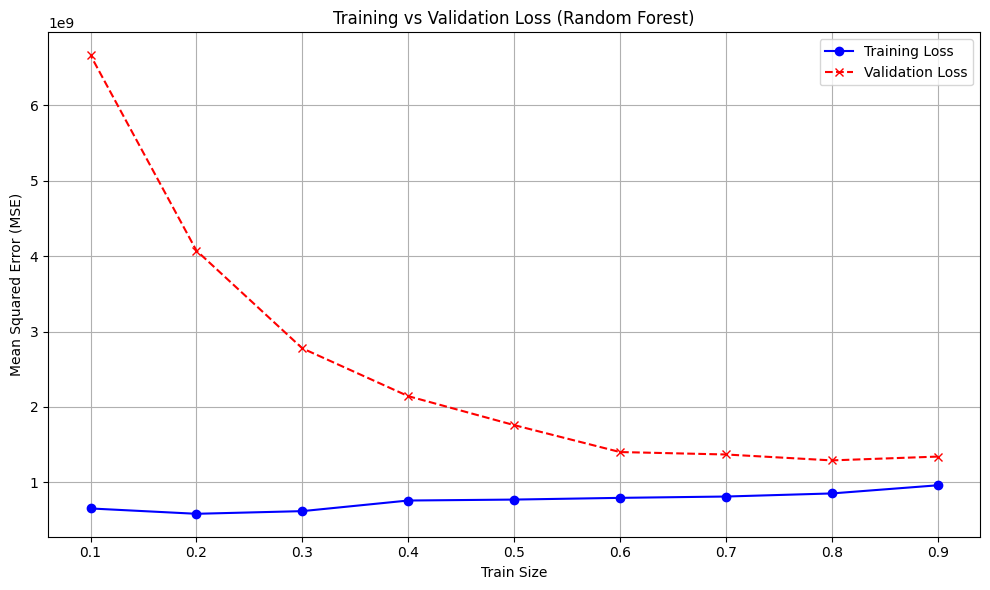

In [ ]:
splitLossValPred(rf_cv.best_estimator_, X, Y, 'Random Forest')

In [ ]:
eval[eval['Model'].str.contains('Random Forest')]

Model Subset           MAE           MSE          RMSE        R2
4  Random Forest   Test  19422.321002  2.318512e+09  48150.929143  0.966483
5  Random Forest  Train  15628.385679  8.514845e+08  29180.208129  0.982203

#**4 - XGBoosting**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [ ]:
xgb = xgb.XGBRegressor()
xgb_cv = GridSearchCV(xgb,
                      xgb_grid,
                      scoring = 'neg_mean_squared_error',
                      return_train_score = True,
                      cv = 5,
                      n_jobs = -1)

start_time = time.time()
xgb_cv.fit(X_train, Y_train)
end_time = time.time()
print('Best XGBoosting Parameters:', xgb_cv.best_params_)

Y_pred_xgb = xgb_cv.predict(X_test)
Y_pred_xgb_train = xgb_cv.predict(X_train)

Best XGBoosting Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
# Evaluate the model
print(f"\n{modelEvaluation('XGBoosting', 'Test', Y_test, Y_pred_xgb)}"
      f"\n\n{modelEvaluation('XGBoosting', 'Train', Y_train, Y_pred_xgb_train)}"
      f"\n\nTraining Time: {(end_time - start_time):.2f} seconds")


        Model Subset          MAE           MSE          RMSE        R2
0  XGBoosting   Test  7934.986522  1.364462e+09  36938.623224  0.980275

        Model Subset          MAE           MSE         RMSE        R2
0  XGBoosting  Train  3636.803049  3.991018e+07  6317.450791  0.999166

Training Time: 24.31 seconds


In [ ]:
# Ensure i have the right param names
print(xgb_cv.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])


In [ ]:
xgbResults = xgb_cv.cv_results_
xgbResults_df = pd.DataFrame({
    'param_learning_rate': xgbResults['param_learning_rate'],
    'param_n_estimators': xgbResults['param_n_estimators'],
    'param_max_depth': xgbResults['param_max_depth'],
    'mean_train_score': xgbResults['mean_train_score'],
    'mean_test_score': xgbResults['mean_test_score'],
    'std_test_score': xgbResults['std_test_score'],
    'rank_test_score': xgbResults['rank_test_score']
})

xgbResults_df = xgbResults_df.sort_values(by = 'rank_test_score').reset_index(drop = True)
xgbResults_df

param_learning_rate param_n_estimators param_max_depth  mean_train_score  \
0                  0.2                150               5     -3.337809e+07   
1                  0.2                100               5     -6.636346e+07   
2                  0.1                150               5     -9.965110e+07   
3                  0.1                100               5     -1.709842e+08   
4                  0.2                150               3     -2.800156e+08   
5                  0.2                 50               5     -1.808389e+08   
6                  0.1                150               7     -2.194100e+07   
7                  0.2                150               7     -4.983488e+06   
8                  0.2                100               7     -1.224067e+07   
9                  0.1                100               7     -4.893937e+07   
10                 0.2                 50               7     -4.523247e+07   
11                 0.2                100               3     -4.226458e+08   
12                 0.1                150               3     -5.573340e+08   
13                 0.1                 50               7     -2.014955e+08   
14                 0.1                 50               5     -4.622671e+08   
15                 0.1                100               3     -7.731566e+08   
16                 0.2                 50               3     -7.806838e+08   
17                 0.1                 50               3     -1.384685e+09   
18                0.01                150               7     -3.871571e+09   
19                0.01                150               5     -4.591317e+09   
20                0.01                150               3     -6.603297e+09   
21                0.01                100               7     -8.434231e+09   
22                0.01                100               5     -9.183026e+09   
23                0.01                100               3     -1.115979e+10   
24                0.01                 50               7     -1.960572e+10   
25                0.01                 50               5     -2.020017e+10   
26                0.01                 50               3     -2.175426e+10   

    mean_test_score  std_test_score  rank_test_score  
0     -7.835120e+08    4.493815e+08                1  
1     -7.962021e+08    4.461985e+08                2  
2     -8.218460e+08    4.255036e+08                3  
3     -8.643635e+08    4.015802e+08                4  
4     -8.699521e+08    3.571117e+08                5  
5     -8.833350e+08    4.324702e+08                6  
6     -8.946554e+08    5.713098e+08                7  
7     -9.151416e+08    5.632407e+08                8  
8     -9.162646e+08    5.563395e+08                9  
9     -9.207776e+08    5.607131e+08               10  
10    -9.455515e+08    5.440204e+08               11  
11    -9.835151e+08    3.382628e+08               12  
12    -1.024494e+09    2.663415e+08               13  
13    -1.058638e+09    5.121267e+08               14  
14    -1.136995e+09    3.280775e+08               15  
15    -1.244199e+09    2.498970e+08               16  
16    -1.271053e+09    2.494249e+08               17  
17    -1.868148e+09    1.946970e+08               18  
18    -4.337194e+09    1.095871e+09               19  
19    -4.994048e+09    1.068255e+09               20  
20    -6.876870e+09    1.595464e+09               21  
21    -8.754510e+09    2.309586e+09               22  
22    -9.447131e+09    2.238033e+09               23  
23    -1.136621e+10    2.724072e+09               24  
24    -1.971868e+10    4.600248e+09               25  
25    -2.022949e+10    4.592163e+09               26  
26    -2.191505e+10    5.017274e+09               27

In [ ]:
featureImportance(X_test, xgb_cv.best_estimator_)

Importance
Manure_Left_On_Pasture        0.639908
Food_Household_Consumption    0.131809
Food_Transport                0.074259
Rice_Cultivation              0.058926
Forestland                    0.030178
On_Farm_Energy_Use            0.020165
On_Farm_Electricity_Use       0.019687
Crop_Residues                 0.016243
Pesticides_Manufacturing      0.008824

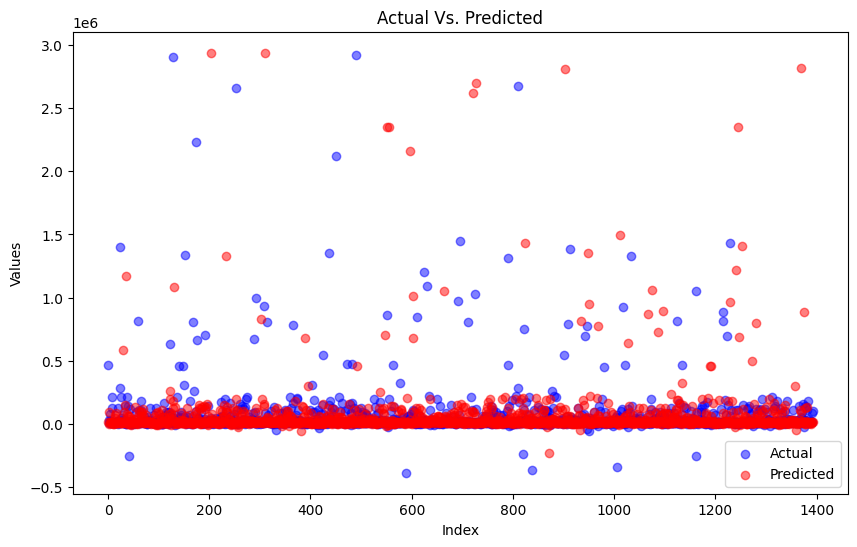

In [ ]:
actualVsPred(Y_train, Y_pred_xgb)

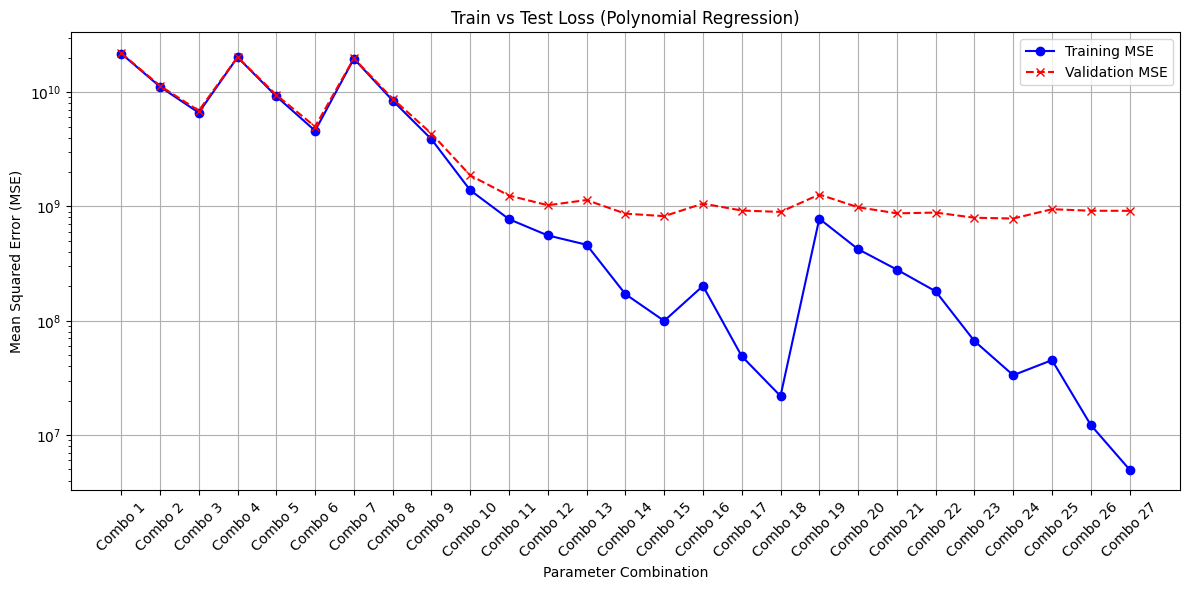


Parameter Combos: 
          learning_rate  max_depth  n_estimators
Combo 1            0.01          3            50
Combo 2            0.01          3           100
Combo 3            0.01          3           150
Combo 4            0.01          5            50
Combo 5            0.01          5           100
Combo 6            0.01          5           150
Combo 7            0.01          7            50
Combo 8            0.01          7           100
Combo 9            0.01          7           150
Combo 10           0.10          3            50
Combo 11           0.10          3           100
Combo 12           0.10          3           150
Combo 13           0.10          5            50
Combo 14           0.10          5           100
Combo 15           0.10          5           150
Combo 16           0.10          7            50
Combo 17           0.10          7           100
Combo 18           0.10          7           150
Combo 19           0.20          3            50


In [ ]:
paramLoss(xgb_cv, 'Polynomial Regression')

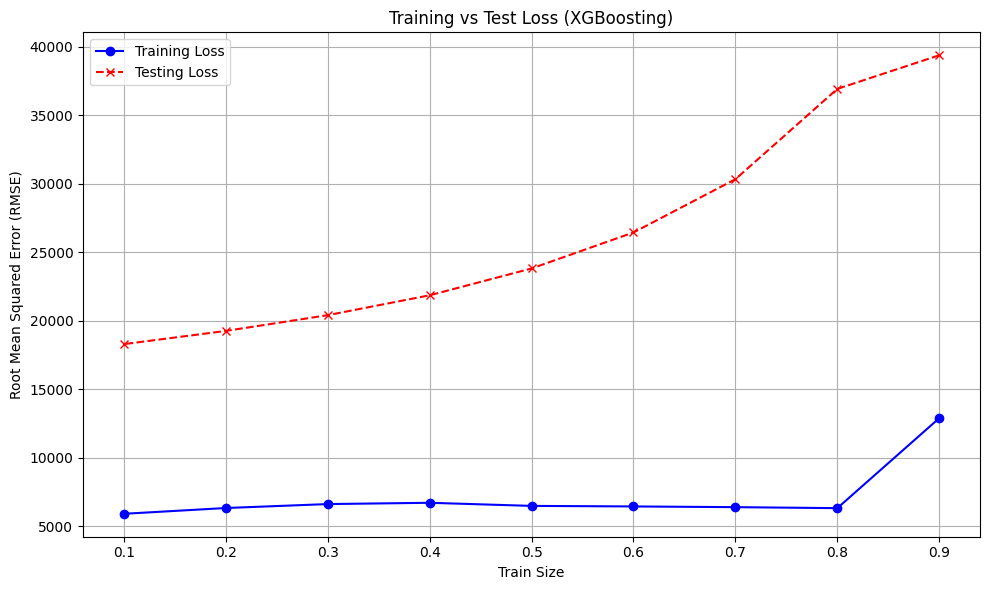

In [ ]:
splitLossSqrt(xgb_cv.best_estimator_, X, Y, 'XGBoosting')

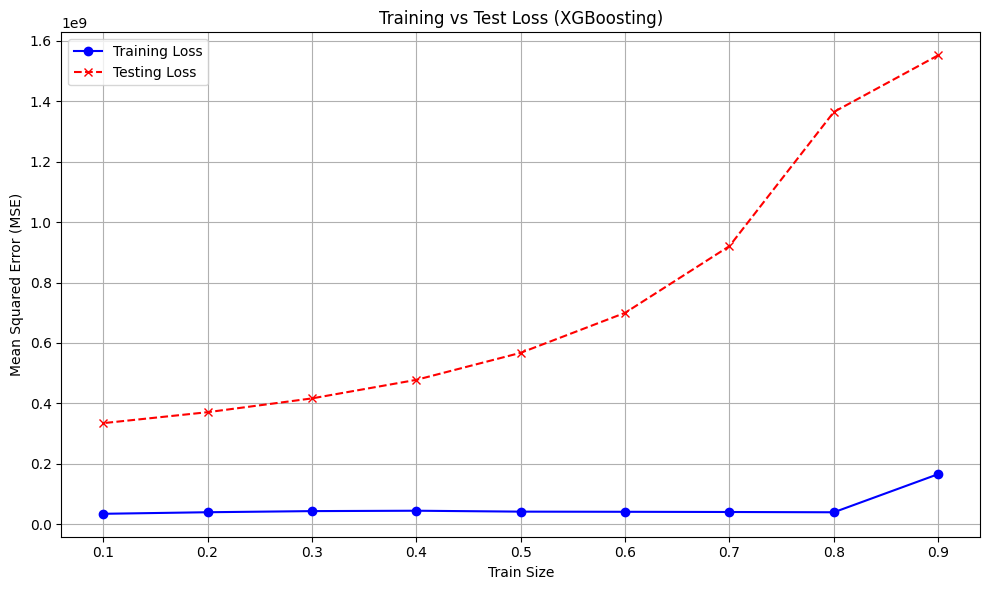

In [ ]:
splitLoss(xgb_cv.best_estimator_, X, Y, 'XGBoosting')

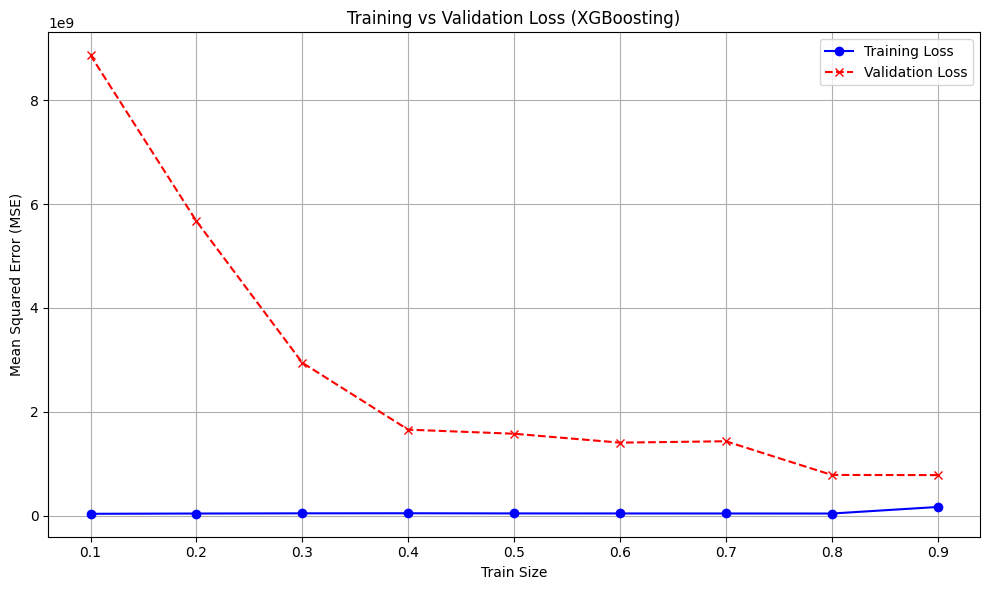

In [ ]:
splitLossValPred(xgb_cv.best_estimator_, X, Y, 'XGBoosting')

In [ ]:
eval[eval['Model'].str.contains('XGBoosting')]

Model Subset          MAE           MSE          RMSE        R2
6  XGBoosting   Test  7934.986522  1.364462e+09  36938.623224  0.980275
7  XGBoosting  Train  3636.803049  3.991018e+07   6317.450791  0.999166

#**All Models Evaluation**

In [ ]:
eval[eval['Subset'].str.contains('Test')].sort_values(by = 'R2', ascending = False)

Model Subset           MAE           MSE          RMSE  \
6             XGBoosting   Test   7934.986522  1.364462e+09  36938.623224   
2      Gradient Boosting   Test   7918.266123  1.535919e+09  39190.806214   
4          Random Forest   Test  19422.321002  2.318512e+09  48150.929143   
0  Polynomial Regression   Test      0.104325  7.071478e-02      0.265922   

         R2  
6  0.980275  
2  0.977796  
4  0.966483  
0  0.946719

#**End of Code**